In [1]:
#!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('ESG_WorldBank_20042023_AllCountries_transposed.xlsx', sheet_name='output')
print(df.head())

  Country Name Continent Country Code  Year  \
0  Afghanistan      Asia          AFG  2004   
1  Afghanistan      Asia          AFG  2005   
2  Afghanistan      Asia          AFG  2006   
3  Afghanistan      Asia          AFG  2007   
4  Afghanistan      Asia          AFG  2008   

   Access to clean fuels and technologies for cooking (% of population)  \
0                                              0.111                      
1                                              0.125                      
2                                              0.139                      
3                                              0.153                      
4                                              0.168                      

   Access to electricity (% of population)  \
0                                 0.238142   
1                                 0.286697   
2                                 0.335444   
3                                 0.384400   
4                                 0.

In [4]:
print(df.shape)

(3820, 75)


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
columns_of_interest = ['Country Name', 'Continent','Country Code', 'Year', 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)', 'Fertility rate, total (births per woman)','Hospital beds (per 1,000 people)','Life expectancy at birth, total (years)','Mortality rate, under-5 (per 1,000 live births)','Population ages 65 and above (% of total population)','Prevalence of undernourishment (% of population)']
df_filtered = df[columns_of_interest]

In [7]:
print(df_filtered.shape)

(3820, 11)


In [8]:
print(df_filtered.columns.tolist())

['Country Name', 'Continent', 'Country Code', 'Year', 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)', 'Fertility rate, total (births per woman)', 'Hospital beds (per 1,000 people)', 'Life expectancy at birth, total (years)', 'Mortality rate, under-5 (per 1,000 live births)', 'Population ages 65 and above (% of total population)', 'Prevalence of undernourishment (% of population)']


In [9]:
null_counts = df_filtered.isnull().sum()
print(null_counts.sort_values(ascending=False))

Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)    3277
Hospital beds (per 1,000 people)                                                                         2148
Prevalence of undernourishment (% of population)                                                          875
Life expectancy at birth, total (years)                                                                   640
Fertility rate, total (births per woman)                                                                  631
Population ages 65 and above (% of total population)                                                      582
Mortality rate, under-5 (per 1,000 live births)                                                           400
Country Code                                                                                                0
Continent                                                                                                   0
Country Na

In [10]:
italy_data = df.loc[df['Country Name'] == 'Italy']

In [11]:
print(italy_data.shape)

(20, 75)


In [12]:
null_counts_italy = df_filtered[df_filtered["Country Name"] == "Italy"].isnull().sum()
print(null_counts_italy.sort_values(ascending=False))

Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)    17
Hospital beds (per 1,000 people)                                                                          5
Fertility rate, total (births per woman)                                                                  3
Population ages 65 and above (% of total population)                                                      3
Life expectancy at birth, total (years)                                                                   3
Prevalence of undernourishment (% of population)                                                          2
Mortality rate, under-5 (per 1,000 live births)                                                           2
Country Code                                                                                              0
Continent                                                                                                 0
Country Name                

In [13]:
df_italy = df_filtered[df_filtered['Country Name'] == 'Italy']

nulls_italy_by_year = df_italy.groupby(['Country Name', 'Year']).apply(lambda x: x.drop(columns=['Continent', 'Country Name', 'Year']).isnull().sum())

nulls_italy_by_year = nulls_italy_by_year.sort_index()
print(nulls_italy_by_year)

                   Country Code  \
Country Name Year                 
Italy        2004             0   
             2005             0   
             2006             0   
             2007             0   
             2008             0   
             2009             0   
             2010             0   
             2011             0   
             2012             0   
             2013             0   
             2014             0   
             2015             0   
             2016             0   
             2017             0   
             2018             0   
             2019             0   
             2020             0   
             2021             0   
             2022             0   
             2023             0   

                   Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)  \
Country Name Year                                                                                        

C:\Users\Pancione\AppData\Local\Temp\ipykernel_31520\1796680790.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulls_italy_by_year = df_italy.groupby(['Country Name', 'Year']).apply(lambda x: x.drop(columns=['Continent', 'Country Name', 'Year']).isnull().sum())


In [14]:
# Group countries by continent
grouped_by_continent = df_filtered.groupby('Continent')

# Now you can iterate through each continent's data
for continent_name, continent_data in grouped_by_continent:
    print(f"\n--- Data for {continent_name} ---")
    print(f"Shape: {continent_data.shape}")


--- Data for Africa ---
Shape: (1080, 11)

--- Data for Asia ---
Shape: (840, 11)

--- Data for Europe ---
Shape: (920, 11)

--- Data for North America ---
Shape: (460, 11)

--- Data for Oceania ---
Shape: (280, 11)

--- Data for South America ---
Shape: (240, 11)


In [15]:
nulls_by_continent = df_filtered.groupby('Continent').apply(lambda x: x.isnull().sum())
nulls_by_continent = nulls_by_continent.sort_index()
print(nulls_by_continent)

               Country Name  Continent  Country Code  Year  \
Continent                                                    
Africa                    0          0             0     0   
Asia                      0          0             0     0   
Europe                    0          0             0     0   
North America             0          0             0     0   
Oceania                   0          0             0     0   
South America             0          0             0     0   

               Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)  \
Continent                                                                                                              
Africa                                                       918                                                       
Asia                                                         714                                                       
Europe                 

C:\Users\Pancione\AppData\Local\Temp\ipykernel_31520\3662463221.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulls_by_continent = df_filtered.groupby('Continent').apply(lambda x: x.isnull().sum())


In [16]:
nulls_by_continent_year = df_filtered.groupby(['Continent', 'Year']).apply(lambda x: x.isnull().sum())
nulls_by_continent_year = nulls_by_continent_year.sort_index()
print(nulls_by_continent_year)

                    Country Name  Continent  Country Code  Year  \
Continent     Year                                                
Africa        2004             0          0             0     0   
              2005             0          0             0     0   
              2006             0          0             0     0   
              2007             0          0             0     0   
              2008             0          0             0     0   
              2009             0          0             0     0   
              2010             0          0             0     0   
              2011             0          0             0     0   
              2012             0          0             0     0   
              2013             0          0             0     0   
              2014             0          0             0     0   
              2015             0          0             0     0   
              2016             0          0             0     

C:\Users\Pancione\AppData\Local\Temp\ipykernel_31520\774152539.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulls_by_continent_year = df_filtered.groupby(['Continent', 'Year']).apply(lambda x: x.isnull().sum())


### Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) 
Africa, Asia, South America: no missing values in 2010, 2015, 2019.
Same for Europe and Oceania, but there are some missing values in these 3 years too (4).
Same for North America, with some missing values in these 3 years too (2).


### Hospital beds (per 1,000 people)
lots of missing values in each year for every continent.

### Mortality rate, under-5 (per 1,000 live births)
For all the continents, no missing values in 2004-2021. 
For all the continents, missing values in 2022-23.  
in Europe there is 1 missing value in other years (Liechtenstein).

### Prevalence of undernourishment (% of population)  
For all the continents, missing values in 2022-23.  
Africa: 5 missing values in 2004-2012, 4 in 2013-19, 3 in 2020-21.
Asia: 8 missing values in 2004-2021.
Europe:4.
NA 5.
Oceania 5.

### Fertility rate, total (births per woman)
For all the continents, no missing values in 2004-2020 .
For all the continents, missing values in 2021-22-23 .
in Europe there are 3 missing value in other years too (Andorra, Monaco, San Marino).
in Oceania there is 1 missing value in other years too (in Palau) .

### Life expectancy at birth, total (years)
Africa, Asia, Europe, NA, Oceania, SA, no missing values in 2004-2020 .
Africa, Asia, Europe, NA, Oceania, SA, missing values in 2021-22-23  .
in Europe there are 3 missing value in other years too (Andorra, Monaco, San Marino).
in Oceania there is 1 missing value in other years too (in Palau) .

### Population ages 65 and above (% of total population)
For all the continents, no missing values in 2004-2020. 
For all the continents, missing values in 2021-22-23 .
In Africa there's 1 missing value in 2012-20 (Eritrea).


In [17]:
#There're missing values both for Italy and Continent-level for Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) 
health_nutri_demog= ['Country Name', 'Continent', 'Year', 'Fertility rate, total (births per woman)','Hospital beds (per 1,000 people)','Life expectancy at birth, total (years)','Mortality rate, under-5 (per 1,000 live births)','Population ages 65 and above (% of total population)','Prevalence of undernourishment (% of population)']
df_hng = df[health_nutri_demog]
df_hng.head()

,Country Name,Continent,Year,"Fertility rate, total (births per woman)","Hospital beds (per 1,000 people)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)",Population ages 65 and above (% of total population),Prevalence of undernourishment (% of population)
0,Afghanistan,Asia,2004,7.069,0.39,57.944,112.8,0.022966,0.363
1,Afghanistan,Asia,2005,6.905,0.42,58.361,108.6,0.022994,0.345
2,Afghanistan,Asia,2006,6.722,0.42,58.684,104.3,0.023024,0.319
3,Afghanistan,Asia,2007,6.530,0.42,59.111,100.0,0.023057,0.286
4,Afghanistan,Asia,2008,6.376,0.42,59.852,95.9,0.023176,0.254


# Health & Nutrition

## Mortality rate, under-5 (per 1,000 live births)

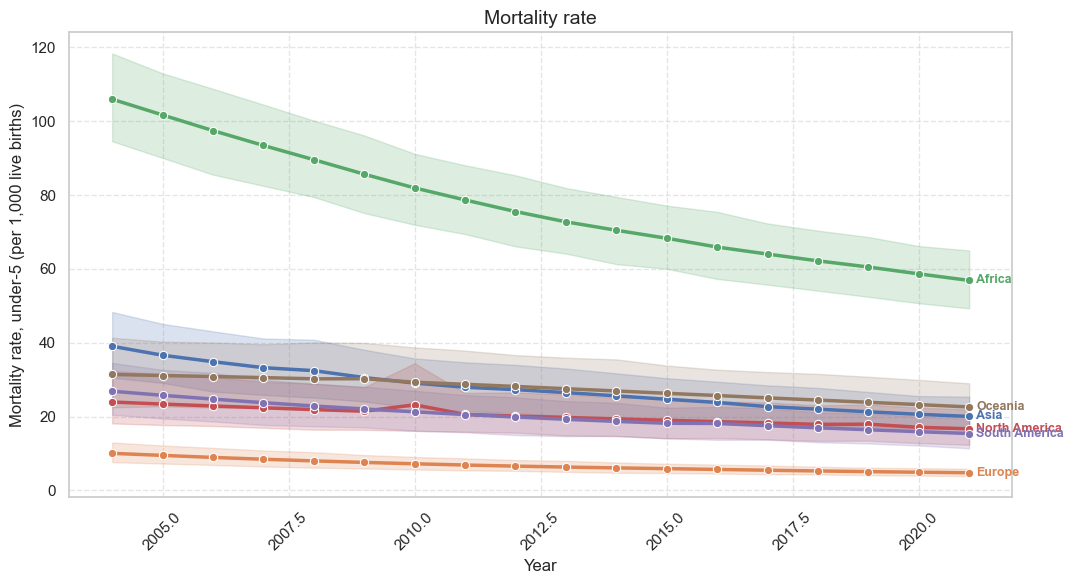

In [18]:
mort= ['Country Name', 'Continent', 'Year','Mortality rate, under-5 (per 1,000 live births)']
df_mort = df[mort]
df_mort.head()

df_mortupd= df_mort[(df_mort['Year'] >= 2004) & (df_mort['Year'] <= 2021)]

avg_by_continent = df_mortupd.groupby(['Continent', 'Year'])['Mortality rate, under-5 (per 1,000 live births)'].mean().reset_index()

# Set plot style
sns.set(style='whitegrid')

# Plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=df_mortupd,
    x='Year',
    y='Mortality rate, under-5 (per 1,000 live births)',
    hue='Continent',
    marker='o',                # Highlight each yearpoint
    linewidth=2.5,
    legend=False               # Remove default legend
)

# Get the lines and continents
lines = ax.get_lines()
continents = df_mortupd['Continent'].unique()

# Add direct labels to each continental line at the end of the line
for i, continent in enumerate(continents):
    line = lines[i]
    xdata = line.get_xdata()
    ydata = line.get_ydata()
    
    # Get the last valid data point
    last_valid_idx = -1
    while last_valid_idx < -len(ydata) and (np.isnan(ydata[last_valid_idx]) if len(ydata) > 0 else True):
        last_valid_idx -= 1
    
    if len(ydata) > 0:
        x = xdata[last_valid_idx]
        y = ydata[last_valid_idx]
        
        # Add text right after the last point
        plt.annotate(
            continent, 
            xy=(x, y),
            xytext=(5, 0),
            textcoords='offset points',
            ha='left',
            va='center',
            color=line.get_color(),
            fontweight='bold',
            fontsize=9
        )

# Customize
plt.title('Mortality rate', fontsize=14)
plt.ylabel('Mortality rate, under-5 (per 1,000 live births)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Adjust right margin to make room for the labels
plt.subplots_adjust(right=0.85)


plt.show()

C:\Users\Pancione\AppData\Local\Temp\ipykernel_31520\3800909664.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(


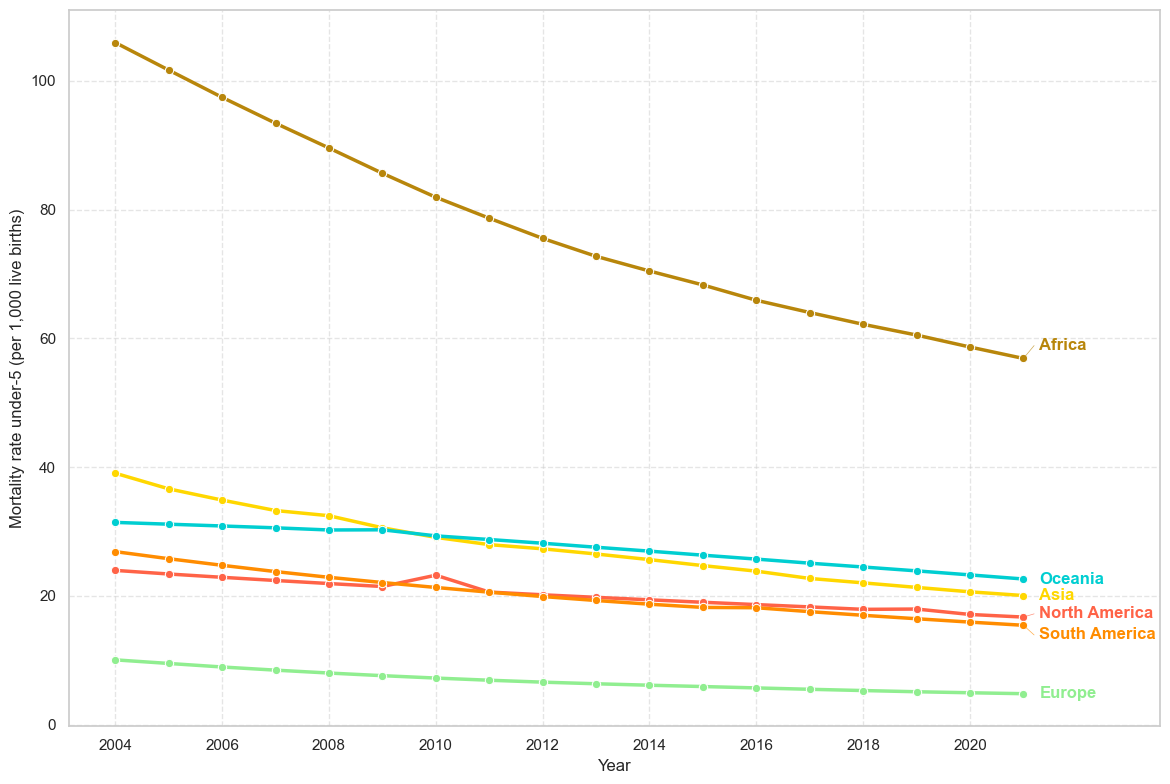

In [19]:
# Assuming df_mortupd, df_no_africa are already defined
italy_df = df_mortupd[df_mortupd['Country Name'] == 'Italy']
plt.figure(figsize=(12, 8))

# Define custom colors for each continent
custom_colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

# Create a color palette from the dictionary
continent_list = df_mortupd['Continent'].unique()
color_palette = [custom_colors.get(cont, 'gray') for cont in continent_list]

# Plot continent averages
ax = sns.lineplot(
    data=df_mortupd,
    x='Year',
    y='Mortality rate, under-5 (per 1,000 live births)',
    hue='Continent',
    marker='o',
    linewidth=2.5,
    palette=color_palette,  # Use custom colors
    ci=None,
    legend=False  # Remove default legend
)


# Set x-axis ticks every 2 years
start_year = int(df_mortupd['Year'].min())
end_year = int(df_mortupd['Year'].max())
years_every_two = np.arange(start_year, end_year + 1, 2)
plt.xticks(ticks=years_every_two, rotation=0)

# Labels and title
plt.ylabel('Mortality rate under-5 (per 1,000 live births)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.5)

# Get the lines and their associated continents
lines = ax.get_lines()

# Manually position the end labels to avoid overlap
# First, collect endpoint data for all lines
endpoints = []
for i, continent in enumerate(continent_list):
    if i < len(lines):  # Ensure we don't exceed the number of lines
        line = lines[i]
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Get the last valid data point
        last_valid_idx = -1
        while last_valid_idx >= -len(ydata) and np.isnan(ydata[last_valid_idx]):
            last_valid_idx -= 1
        
        if abs(last_valid_idx) < len(ydata):  # Ensure index is valid
            x = xdata[last_valid_idx]
            y = ydata[last_valid_idx]
            endpoints.append((continent, x, y, custom_colors.get(continent, 'gray')))



# Instead of trying to calculate positions automatically, use fixed vertical offsets
# Define manual vertical offsets for each continent based on their typical positions
vertical_offsets = {
    'Africa': 2,        # Position Africa further up
    'Asia': 0,          # Keep Asia at its position
    'Europe': 0,        # Keep Europe at its position
    'North America': 0.5, # Move North America down
    'South America': -1.5, # Move South America up
    'Oceania': 0,     # Move Oceania down
}

# Add labels with manual offsets
for continent, x, y, color in endpoints:
    # Apply the manual offset
    offset = vertical_offsets.get(continent, 0)
    adjusted_y = y + offset
    
    # Draw a connecting line if the label is moved
    if offset != 0:
        plt.plot([x, x + 0.2], [y, adjusted_y], 
                 color=color, linewidth=0.5, alpha=0.7)
    
    # Add the label with more space to the right
    plt.annotate(
        continent, 
        xy=(x + 0.3, adjusted_y),  # Position further right of the endpoint
        ha='left',
        va='center',
        color=color,
        fontweight='bold'
    )

# Expand the x-axis limit to make room for labels
x_min, x_max = plt.xlim()
plt.xlim(x_min, x_max + 1.5)  # Add extra space on the right for labels

plt.tight_layout()
plt.savefig('mortality rate_wo italy.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Pancione\AppData\Local\Temp\ipykernel_31520\2518399971.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(


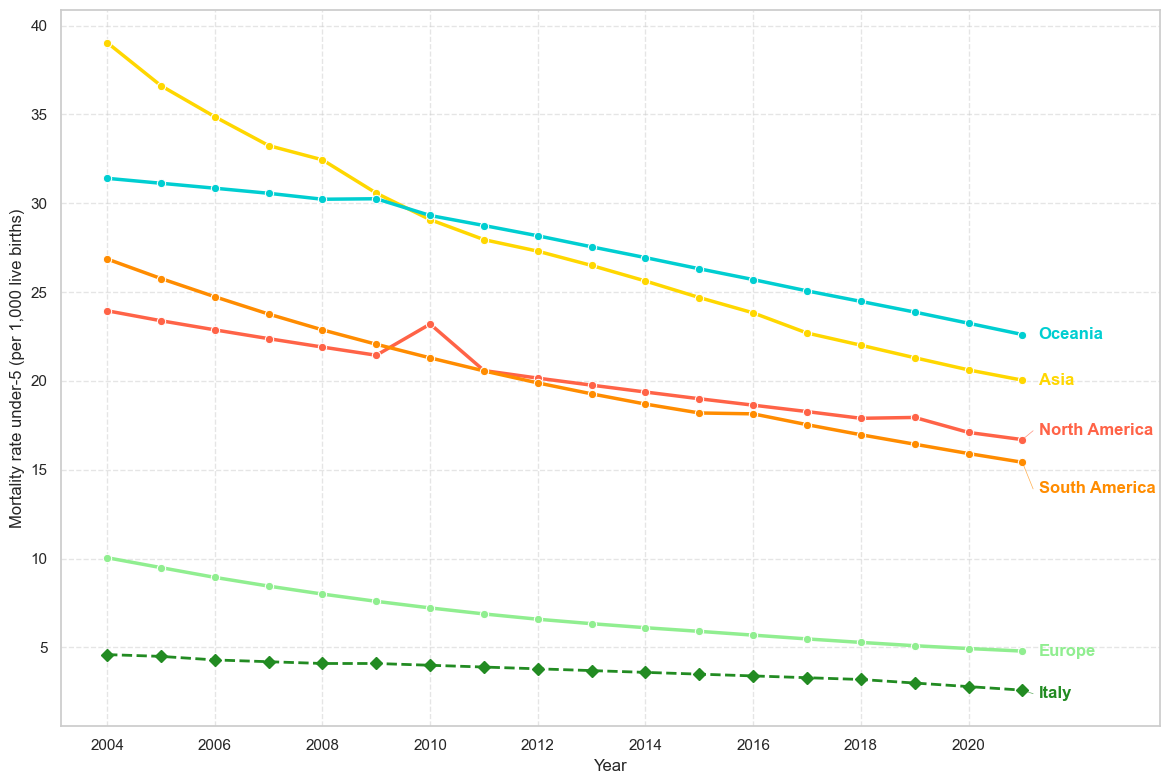

In [20]:
df_no_africa = df_mortupd[df_mortupd['Continent'] != 'Africa']

years = np.arange(df_no_africa['Year'].min(), df_no_africa['Year'].max() + 1)

# Assuming df_mortupd, df_no_africa are already defined
italy_df = df_no_africa[df_no_africa['Country Name'] == 'Italy']
plt.figure(figsize=(12, 8))

# Define custom colors for each continent
custom_colors = {
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

# Create a color palette from the dictionary
continent_list = df_no_africa['Continent'].unique()
color_palette = [custom_colors.get(cont, 'gray') for cont in continent_list]

# Plot continent averages
ax = sns.lineplot(
    data=df_no_africa,
    x='Year',
    y='Mortality rate, under-5 (per 1,000 live births)',
    hue='Continent',
    marker='o',
    linewidth=2.5,
    palette=color_palette,  # Use custom colors
    ci=None,
    legend=False  # Remove default legend
)

# Add Italy
plt.plot(
    italy_df['Year'],
    italy_df['Mortality rate, under-5 (per 1,000 live births)'],
    color='forestgreen',
    marker='D',
    linestyle='--',
    linewidth=2
)

# Set x-axis ticks every 2 years
start_year = int(df_no_africa['Year'].min())
end_year = int(df_no_africa['Year'].max())
years_every_two = np.arange(start_year, end_year + 1, 2)
plt.xticks(ticks=years_every_two, rotation=0)

# Labels and title
plt.ylabel('Mortality rate under-5 (per 1,000 live births)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.5)

# Get the lines and their associated continents
lines = ax.get_lines()

# Manually position the end labels to avoid overlap
# First, collect endpoint data for all lines
endpoints = []
for i, continent in enumerate(continent_list):
    if i < len(lines):  # Ensure we don't exceed the number of lines
        line = lines[i]
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Get the last valid data point
        last_valid_idx = -1
        while last_valid_idx >= -len(ydata) and np.isnan(ydata[last_valid_idx]):
            last_valid_idx -= 1
        
        if abs(last_valid_idx) < len(ydata):  # Ensure index is valid
            x = xdata[last_valid_idx]
            y = ydata[last_valid_idx]
            endpoints.append((continent, x, y, custom_colors.get(continent, 'gray')))

# Add Italy's endpoint
italy_x = italy_df['Year'].iloc[-1]
italy_y = italy_df['Mortality rate, under-5 (per 1,000 live births)'].iloc[-1]
endpoints.append(('Italy', italy_x, italy_y, 'forestgreen'))

# Instead of trying to calculate positions automatically, use fixed vertical offsets
# Define manual vertical offsets for each continent based on their typical positions
vertical_offsets = {
    'Africa': 2,        # Position Africa further up
    'Asia': 0,          # Keep Asia at its position
    'Europe': 0,        # Keep Europe at its position
    'North America': 0.5, # Move North America down
    'South America': -1.5, # Move South America up
    'Oceania': 0,     # Move Oceania down
    'Italy': -0.2           # Keep Italy at its position
}

# Add labels with manual offsets
for continent, x, y, color in endpoints:
    # Apply the manual offset
    offset = vertical_offsets.get(continent, 0)
    adjusted_y = y + offset
    
    # Draw a connecting line if the label is moved
    if offset != 0:
        plt.plot([x, x + 0.2], [y, adjusted_y], 
                 color=color, linewidth=0.5, alpha=0.7)
    
    # Add the label with more space to the right
    plt.annotate(
        continent, 
        xy=(x + 0.3, adjusted_y),  # Position further right of the endpoint
        ha='left',
        va='center',
        color=color,
        fontweight='bold'
    )

# Expand the x-axis limit to make room for labels
x_min, x_max = plt.xlim()
plt.xlim(x_min, x_max + 1.5)  # Add extra space on the right for labels

plt.tight_layout()
plt.savefig('mortality rate_wo Africa.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Pancione\AppData\Local\Temp\ipykernel_31520\3754401731.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(


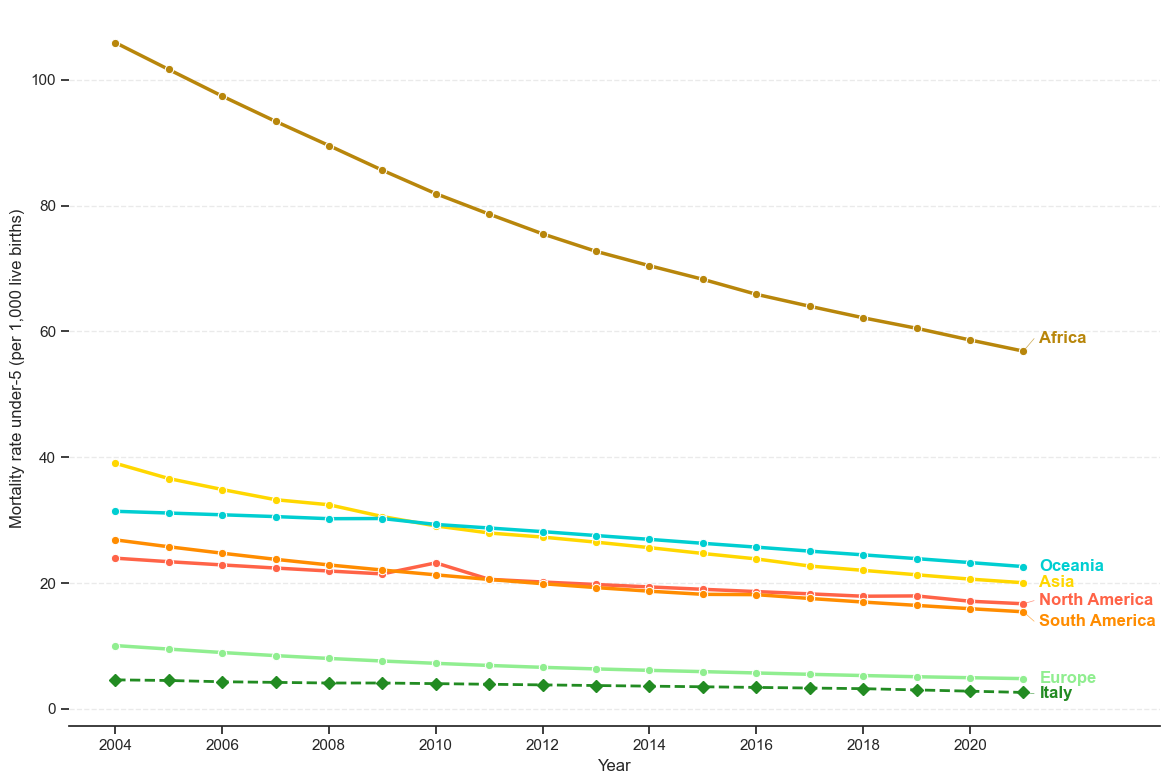

In [52]:
# Assuming df_mortupd, df_no_africa are already defined
italy_df = df_mortupd[df_mortupd['Country Name'] == 'Italy']
plt.figure(figsize=(12, 8))

# Define custom colors for each continent
custom_colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

# Create a color palette from the dictionary
continent_list = df_mortupd['Continent'].unique()
color_palette = [custom_colors.get(cont, 'gray') for cont in continent_list]

# Plot continent averages
ax = sns.lineplot(
    data=df_mortupd,
    x='Year',
    y='Mortality rate, under-5 (per 1,000 live births)',
    hue='Continent',
    marker='o',
    linewidth=2.5,
    palette=color_palette,  # Use custom colors
    ci=None,
    legend=False  # Remove default legend
)

# Add Italy
plt.plot(
    italy_df['Year'],
    italy_df['Mortality rate, under-5 (per 1,000 live births)'],
    color='forestgreen',
    marker='D',
    linestyle='--',
    linewidth=2
)

# Set x-axis ticks every 2 years
start_year = int(df_mortupd['Year'].min())
end_year = int(df_mortupd['Year'].max())
years_every_two = np.arange(start_year, end_year + 1, 2)
plt.xticks(ticks=years_every_two, rotation=0)

# Labels and title
plt.xlabel('Year')
plt.ylabel('Mortality rate under-5 (per 1,000 live births)')
plt.grid(axis='y', linestyle='--', alpha=0.4)  # Solo linee orizzontali leggere

# Get the lines and their associated continents
lines = ax.get_lines()

# Manually position the end labels to avoid overlap
# First, collect endpoint data for all lines
endpoints = []
for i, continent in enumerate(continent_list):
    if i < len(lines):  # Ensure we don't exceed the number of lines
        line = lines[i]
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Get the last valid data point
        last_valid_idx = -1
        while last_valid_idx >= -len(ydata) and np.isnan(ydata[last_valid_idx]):
            last_valid_idx -= 1
        
        if abs(last_valid_idx) < len(ydata):  # Ensure index is valid
            x = xdata[last_valid_idx]
            y = ydata[last_valid_idx]
            endpoints.append((continent, x, y, custom_colors.get(continent, 'gray')))

# Add Italy's endpoint
italy_x = italy_df['Year'].iloc[-1]
italy_y = italy_df['Mortality rate, under-5 (per 1,000 live births)'].iloc[-1]
endpoints.append(('Italy', italy_x, italy_y, 'forestgreen'))

# Instead of trying to calculate positions automatically, use fixed vertical offsets
# Define manual vertical offsets for each continent based on their typical positions
vertical_offsets = {
    'Africa': 2,        # Position Africa further up
    'Asia': 0,          # Keep Asia at its position
    'Europe': 0,        # Keep Europe at its position
    'North America': 0.5, # Move North America down
    'South America': -1.5, # Move South America up
    'Oceania': 0,     # Move Oceania down
    'Italy': -0.2           # Keep Italy at its position
}

# Add labels with manual offsets
for continent, x, y, color in endpoints:
    # Apply the manual offset
    offset = vertical_offsets.get(continent, 0)
    adjusted_y = y + offset
    
    # Draw a connecting line if the label is moved
    if offset != 0:
        plt.plot([x, x + 0.2], [y, adjusted_y], 
                 color=color, linewidth=0.5, alpha=0.7)
    
    # Add the label with more space to the right
    plt.annotate(
        continent, 
        xy=(x + 0.3, adjusted_y),  # Position further right of the endpoint
        ha='left',
        va='center',
        color=color,
        fontweight='bold'
    )

# Expand the x-axis limit to make room for labels
x_min, x_max = plt.xlim()
plt.xlim(x_min, x_max + 1.5)  # Add extra space on the right for labels

# Rimuovi tutti i bordi tranne quello inferiore (asse X)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

plt.tight_layout()
plt.savefig('mortality rate.png', dpi=300, bbox_inches='tight')
plt.show()

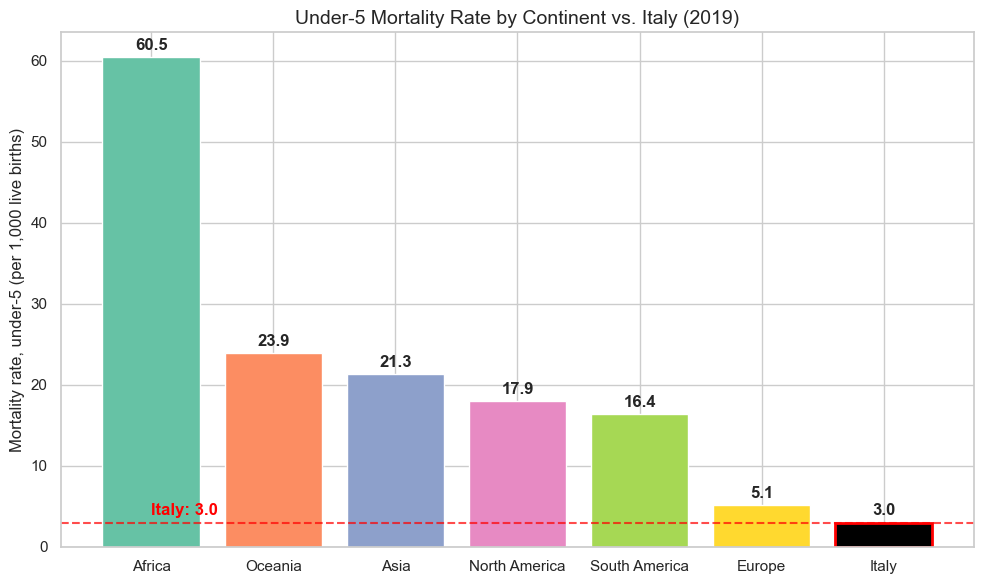

In [22]:
#Comparison Italy and Continents using fix year 2019
# Assuming df_mortupd is your main dataframe
# Filter for just 2019 data
df_2019 = df_mortupd[df_mortupd['Year'] == 2019].copy()

# Extract Italy's value for 2019
italy_value = df_2019[df_2019['Country Name'] == 'Italy']['Mortality rate, under-5 (per 1,000 live births)'].values[0]

# Get continent averages (excluding Italy to avoid double counting)
continent_data = df_2019[df_2019['Country Name'] != 'Italy'].groupby('Continent')['Mortality rate, under-5 (per 1,000 live births)'].mean().reset_index()

# Add Italy as a separate "continent" for comparison
italy_row = pd.DataFrame({
    'Continent': ['Italy'],
    'Mortality rate, under-5 (per 1,000 live births)': [italy_value]
})
comparison_data = pd.concat([continent_data, italy_row], ignore_index=True)

# Sort by mortality rate (descending)
comparison_data = comparison_data.sort_values('Mortality rate, under-5 (per 1,000 live births)', ascending=False)

# Set up the plot with a clean style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create color mapping to keep Italy distinct
colors = sns.color_palette("Set2", n_colors=len(comparison_data) - 1)
colors = [*colors, 'black']  # Add black for Italy

# Create the bar chart with distinctive colors
bars = plt.bar(
    comparison_data['Continent'],
    comparison_data['Mortality rate, under-5 (per 1,000 live births)'],
    color=[colors[i] for i in range(len(comparison_data))]
)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + 0.5,
        f'{height:.1f}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

# Highlight Italy's bar
italy_index = comparison_data['Continent'].tolist().index('Italy')
bars[italy_index].set_edgecolor('red')
bars[italy_index].set_linewidth(2)

# Add a horizontal line at Italy's value for comparison
plt.axhline(y=italy_value, color='red', linestyle='--', alpha=0.7)

# Customize the plot
plt.title('Under-5 Mortality Rate by Continent vs. Italy (2019)', fontsize=14)
plt.ylabel('Mortality rate, under-5 (per 1,000 live births)')
plt.xlabel('')
plt.xticks(rotation=0)

# Add annotation for Italy's reference line
plt.text(
    0,  # Left edge of plot
    italy_value + 0.5,
    f'Italy: {italy_value:.1f}',
    color='red',
    fontweight='bold',
    ha='left',
    va='bottom'
)

plt.tight_layout()
plt.show()

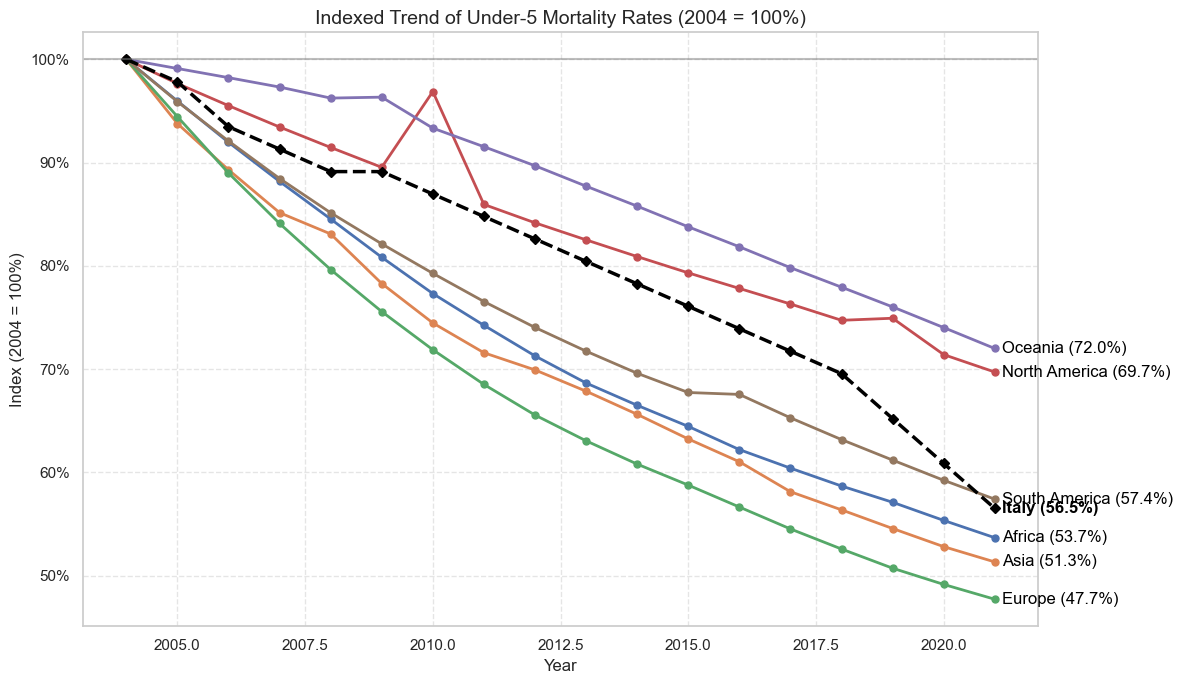

In [23]:
import matplotlib.ticker as mtick

# Set the overall style
sns.set_style("whitegrid")

# ========================================================
# VISUALIZATION 3: INDEXED TREND CHART
# ========================================================
# Extract Italy's data
italy_df = df_mortupd[df_mortupd['Country Name'] == 'Italy'].copy()

# Create a pivot table for easier plotting
df_pivot = df_mortupd.pivot_table(
    index='Year', 
    columns='Continent', 
    values='Mortality rate, under-5 (per 1,000 live births)',
    aggfunc='mean'
)

# Add Italy to the pivot table
df_pivot['Italy'] = italy_df.set_index('Year')['Mortality rate, under-5 (per 1,000 live births)']

# Create indexed data (2004 = 100)
df_indexed = df_pivot.copy()

for column in df_indexed.columns:
    base_value = df_indexed[column].iloc[0]  # Value in 2004
    df_indexed[column] = (df_indexed[column] / base_value) * 100

# Create figure
plt.figure(figsize=(12, 7))

# Plot each continent as a separate line
for column in df_indexed.columns:
    color = 'black' if column == 'Italy' else None
    linestyle = '--' if column == 'Italy' else '-'
    linewidth = 2.5 if column == 'Italy' else 2
    marker = 'D' if column == 'Italy' else 'o'
    
    plt.plot(
        df_indexed.index,
        df_indexed[column],
        label=column,
        color=color,
        linestyle=linestyle,
        linewidth=linewidth,
        marker=marker,
        markersize=5
    )

# Add a horizontal line at 100 (base year value)
plt.axhline(y=100, color='gray', linestyle='-', alpha=0.5)

# Add labels for the end of each line
for column in df_indexed.columns:
    last_year = df_indexed.index[-1]
    last_value = df_indexed[column].iloc[-1]
    
    plt.annotate(
        f"{column} ({last_value:.1f}%)",
        xy=(last_year, last_value),
        xytext=(5, 0),
        textcoords='offset points',
        ha='left',
        va='center',
        fontweight='bold' if column == 'Italy' else 'normal',
        color='black'
    )

plt.title('Indexed Trend of Under-5 Mortality Rates (2004 = 100%)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Index (2004 = 100%)')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# To save the figure:
# plt.savefig('indexed_chart.png', dpi=300, bbox_inches='tight')
# plt.show()

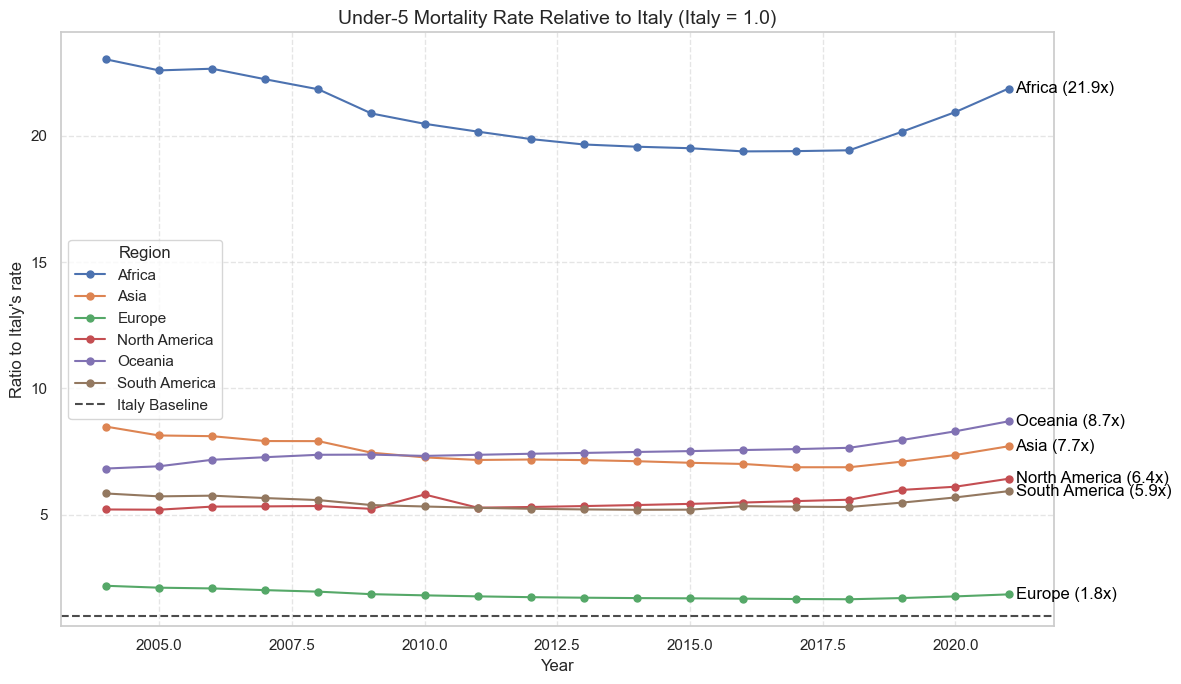

In [24]:
import matplotlib.ticker as mtick

# Set the overall style
sns.set_style("whitegrid")

# ========================================================
# VISUALIZATION 4: RATIO TO ITALY CHART
# ========================================================
# Extract Italy's data
italy_df = df_mortupd[df_mortupd['Country Name'] == 'Italy'].copy()

# Create a pivot table for easier plotting
df_pivot = df_mortupd.pivot_table(
    index='Year', 
    columns='Continent', 
    values='Mortality rate, under-5 (per 1,000 live births)',
    aggfunc='mean'
)

# Add Italy to the pivot table
df_pivot['Italy'] = italy_df.set_index('Year')['Mortality rate, under-5 (per 1,000 live births)']

# Calculate relative performance compared to Italy
italy_series = df_pivot['Italy']
df_relative = df_pivot.copy()

# Drop Italy from the relative dataframe
df_relative = df_relative.drop(columns=['Italy'])

# Calculate ratio to Italy's value (>1 means worse than Italy)
for column in df_relative.columns:
    df_relative[column] = df_relative[column] / italy_series

# Create figure
plt.figure(figsize=(12, 7))

# Plot each continent's ratio to Italy
for column in df_relative.columns:
    plt.plot(
        df_relative.index,
        df_relative[column],
        label=column,
        marker='o',
        markersize=5
    )

# Add a horizontal line at 1.0 (equal to Italy)
plt.axhline(y=1.0, color='black', linestyle='--', alpha=0.7, label='Italy Baseline')

# Add labels for the end of each line
for column in df_relative.columns:
    last_year = df_relative.index[-1]
    last_value = df_relative[column].iloc[-1]
    
    plt.annotate(
        f"{column} ({last_value:.1f}x)",
        xy=(last_year, last_value),
        xytext=(5, 0),
        textcoords='offset points',
        ha='left',
        va='center',
        color='black'
    )

plt.title('Under-5 Mortality Rate Relative to Italy (Italy = 1.0)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Ratio to Italy\'s rate')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Region')
plt.tight_layout()

# To save the figure:
# plt.savefig('ratio_chart.png', dpi=300, bbox_inches='tight')
# plt.show()

## Prevalence of undernourishment (% of population)
For all the continents, missing values in 2022-23.
Africa: 5 missing values in 2004-2012, 4 in 2013-19, 3 in 2020-21. Asia: 8 missing values in 2004-2021. Europe:4. NA 5. Oceania 5.

C:\Users\Pancione\AppData\Local\Temp\ipykernel_31520\2336692611.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_for_plot['Continent'] = 'Italy'


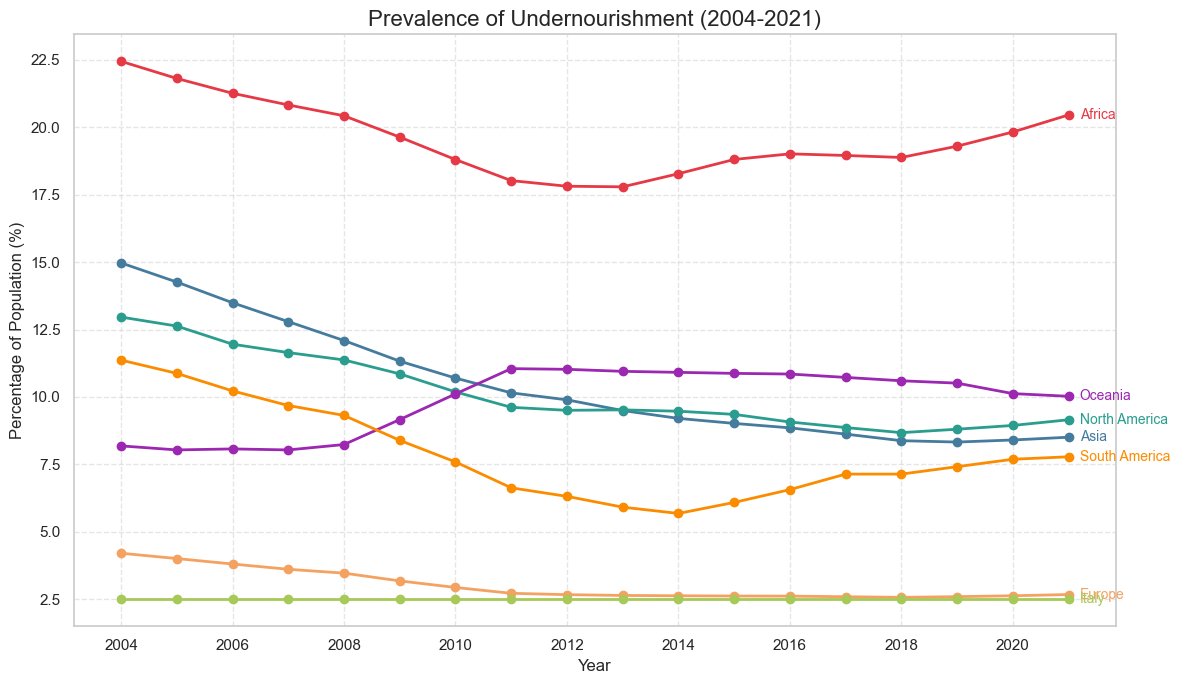

In [25]:
preval_undern= ['Country Name', 'Continent', 'Year','Prevalence of undernourishment (% of population)']
df_pu = df[preval_undern]
df_pu.head()

df_pu0421= df_pu[(df_pu['Year'] >= 2004) & (df_pu['Year'] <= 2021)]

italy_data = df_pu0421[df_pu0421['Country Name'] == 'Italy']
continent_data = df_pu0421.groupby(['Continent', 'Year']).agg({'Prevalence of undernourishment (% of population)': 'mean'}).reset_index()

# Prepare Italy data for plotting
italy_for_plot = italy_data[['Year', 'Prevalence of undernourishment (% of population)']]
italy_for_plot['Continent'] = 'Italy'
italy_for_plot = italy_for_plot[['Continent', 'Year', 'Prevalence of undernourishment (% of population)']]

# Combine Italy with continent data
plot_data = pd.concat([continent_data, italy_for_plot])

if plot_data['Prevalence of undernourishment (% of population)'].max() < 1:
    plot_data['Prevalence of undernourishment (% of population)'] *= 100

# Create the plot
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Define a new color palette with distinctive colors
colors = {
    'Africa': '#E63946',      # Bright red
    'Asia': '#457B9D',        # Steel blue
    'Europe': '#F4A261',      # Sandy brown
    'North America': '#2A9D8F', # Teal
    'Oceania': '#9C27B0',     # Purple
    'South America': '#FB8C00', # Orange
    'Italy': '#A7C957'        # Light green
}

# Plot each continent and Italy with consistent styling
for continent in plot_data['Continent'].unique():
    cont_data = plot_data[plot_data['Continent'] == continent]
    
    # Use consistent line width for all
    linewidth = 2
    
    # Plot with points at each year
    plt.plot(cont_data['Year'], 
             cont_data['Prevalence of undernourishment (% of population)'],
             'o-',  # Line with circle markers
             linewidth=linewidth,
             color=colors.get(continent))
    
    # Add the continent name at the end of each line
    last_valid_idx = cont_data['Prevalence of undernourishment (% of population)'].last_valid_index()
    if last_valid_idx is not None:
        last_year = cont_data.loc[last_valid_idx, 'Year']
        last_value = cont_data.loc[last_valid_idx, 'Prevalence of undernourishment (% of population)']
    else:
        # If no valid index (all NaN), use the last row
        last_year = cont_data['Year'].iloc[-1]
        last_value = cont_data['Prevalence of undernourishment (% of population)'].iloc[-1]
    
    # Add text label at the end of each line
    plt.text(last_year + 0.2, last_value, continent, fontsize=10, 
             verticalalignment='center', color=colors.get(continent, 'black'))

plt.title('Prevalence of Undernourishment (2004-2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Population (%)', fontsize=12)
plt.xticks(range(2004, 2022, 2))

plt.grid(True, linestyle='--', alpha=0.5)

# No legend as requested
plt.tight_layout()

plt.show()

C:\Users\Pancione\AppData\Local\Temp\ipykernel_31520\349206959.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_for_plot['Entity'] = 'Italy'


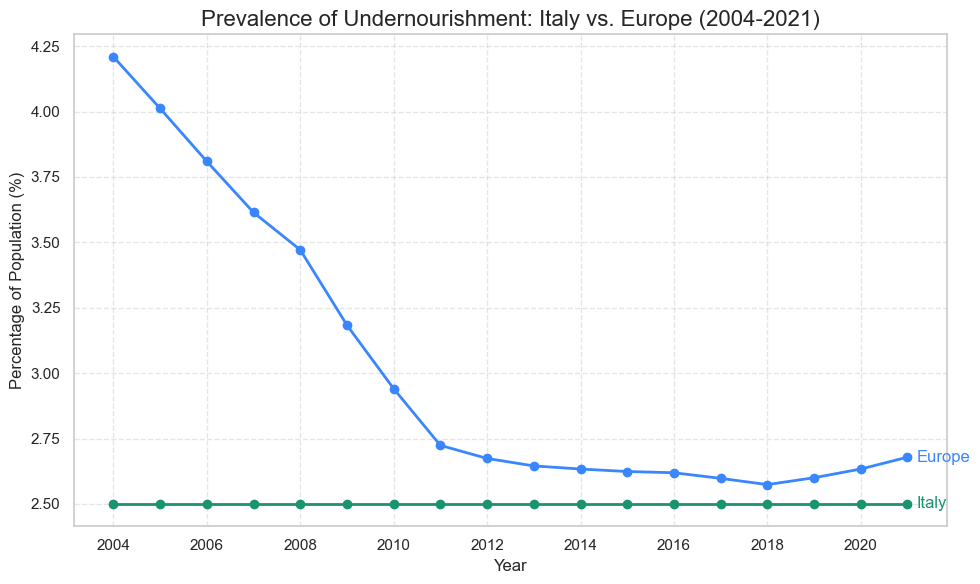

In [26]:
# Create a filter for Italy
italy_data = df_pu0421[df_pu0421['Country Name'] == 'Italy']

# Create a filter for Europe (continent average)
europe_data = df_pu0421[df_pu0421['Continent'] == 'Europe'].groupby('Year').agg({
    'Prevalence of undernourishment (% of population)': 'mean'
}).reset_index()
europe_data['Entity'] = 'Europe'

# Prepare Italy data for plotting
italy_for_plot = italy_data[['Year', 'Prevalence of undernourishment (% of population)']]
italy_for_plot['Entity'] = 'Italy'

# Combine Italy with Europe data
plot_data = pd.concat([
    italy_for_plot[['Entity', 'Year', 'Prevalence of undernourishment (% of population)']],
    europe_data[['Entity', 'Year', 'Prevalence of undernourishment (% of population)']]
])

# Convert to percentage (multiply by 100)
if plot_data['Prevalence of undernourishment (% of population)'].max() < 1:
    plot_data['Prevalence of undernourishment (% of population)'] *= 100

# Create the plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

colors = {
    'Italy': '#1A936F',  # Green
    'Europe': '#3A86FF'  # Blue
}

# Plot Italy and Europe
for entity in ['Italy', 'Europe']:
    entity_data = plot_data[plot_data['Entity'] == entity]
    
    plt.plot(entity_data['Year'], 
             entity_data['Prevalence of undernourishment (% of population)'],
             'o-',  # Line with circle markers
             linewidth=2,
             markersize=6,
             color=colors[entity])
    
    last_valid_year = entity_data['Year'].iloc[-1]
    last_valid_value = entity_data['Prevalence of undernourishment (% of population)'].iloc[-1]
    
    plt.text(last_valid_year + 0.2, last_valid_value, entity, fontsize=12, 
             verticalalignment='center', color=colors[entity])

plt.title('Prevalence of Undernourishment: Italy vs. Europe (2004-2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Population (%)', fontsize=12)
plt.xticks(range(2004, 2022, 2))
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()

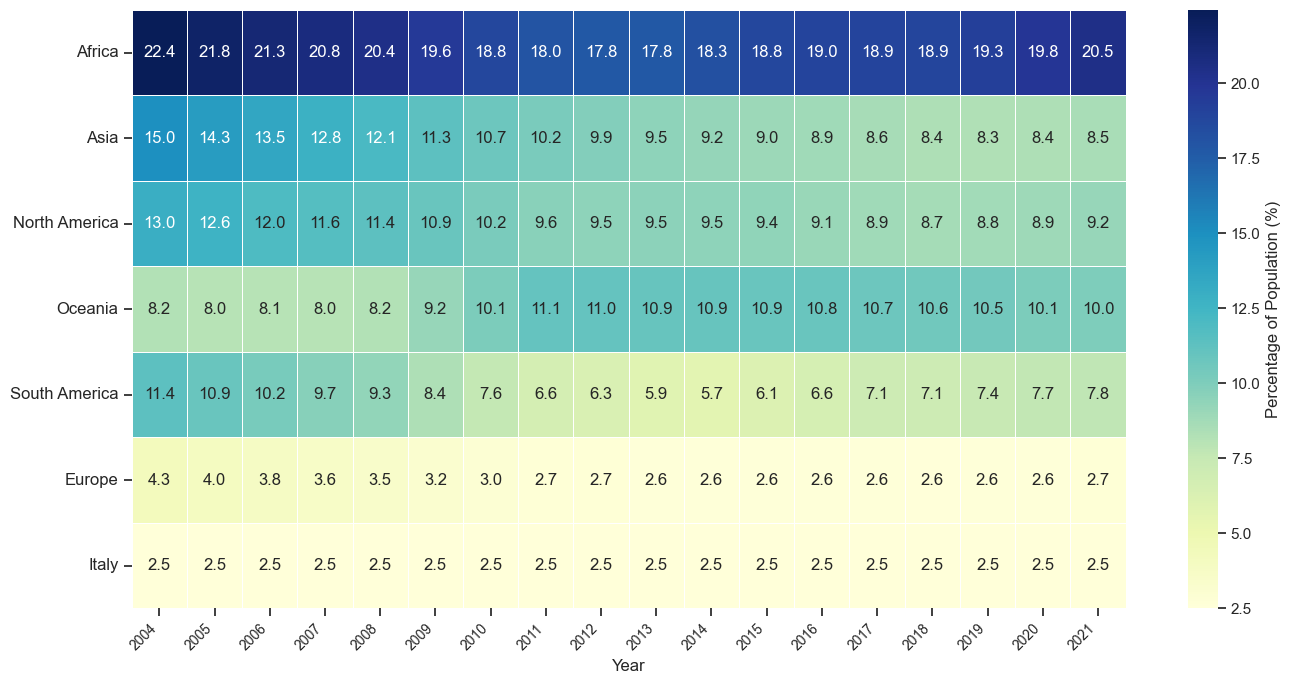

In [46]:
# Create a filter for Italy
italy_data = df_pu0421[df_pu0421['Country Name'] == 'Italy'].copy()
italy_data['Continent'] = 'Italy'  # Replace continent with 'Italy' for comparison

# Group by Continent and Year for all other countries
continent_data = df_pu0421[df_pu0421['Country Name'] != 'Italy'].groupby(['Continent', 'Year']).agg({
    'Prevalence of undernourishment (% of population)': 'mean'
}).reset_index()

# Combine Italy with continent data
combined_data = pd.concat([
    continent_data,
    italy_data[['Continent', 'Year', 'Prevalence of undernourishment (% of population)']]
])

# Convert to percentage if needed
if combined_data['Prevalence of undernourishment (% of population)'].max() < 1:
    combined_data['Prevalence of undernourishment (% of population)'] *= 100

# Pivot the data for the heatmap
heatmap_data = combined_data.pivot(
    index='Continent', 
    columns='Year', 
    values='Prevalence of undernourishment (% of population)'
)

# Calculate the average undernourishment for each continent/region to sort by
# Sort in descending order (highest values first)
avg_undernourishment = heatmap_data.mean(axis=1).sort_values(ascending=False)

# Reorder the heatmap data based on descending average values
heatmap_data = heatmap_data.reindex(avg_undernourishment.index)

# Create the heatmap
plt.figure(figsize=(14, 7))

# Create the heatmap with annotations
ax = sns.heatmap(
    heatmap_data, 
    annot=True,                   # Show values in cells
    fmt=".1f",                    # Format to 1 decimal place
    cmap= plt.cm.YlGnBu,             # Use our custom colormap
    linewidths=0.5,               # Add lines between cells
    cbar_kws={'label': 'Percentage of Population (%)'}  # Label for colorbar
)

# Improve labels and title
plt.title('', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('', fontsize=12)  # Remove y-axis label as it's redundant

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('undernourishment_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()

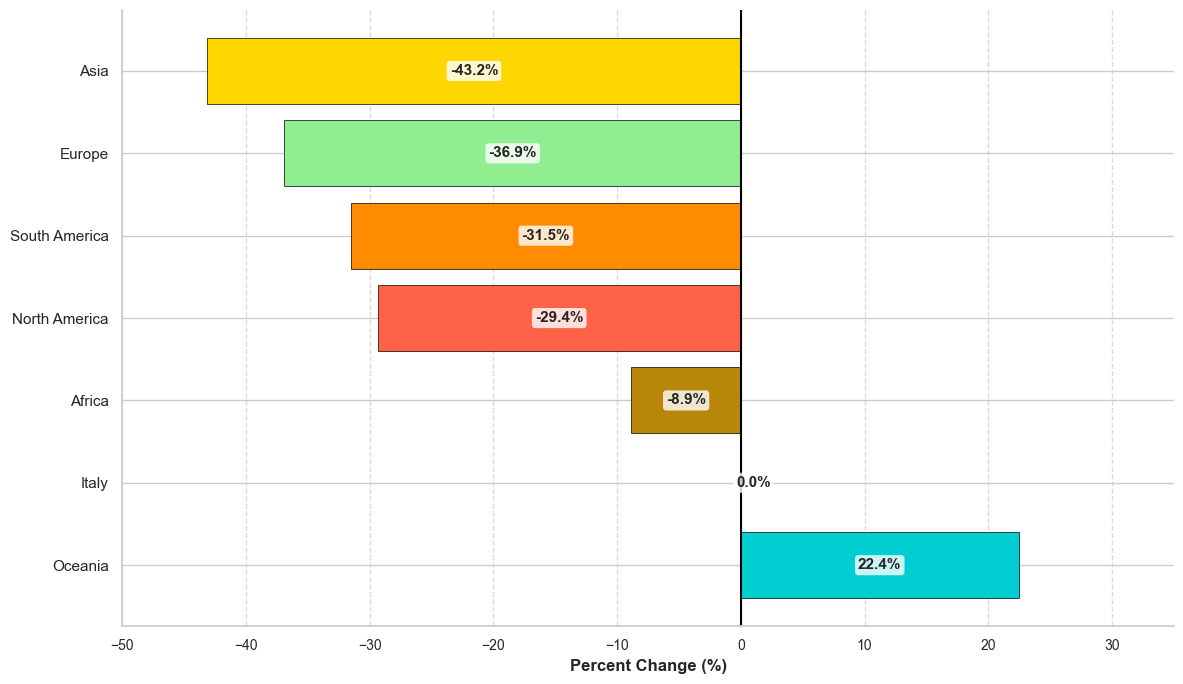

In [28]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get data for the first and last years
start_year = 2004
end_year = 2021

# Filter data for start and end years
start_data = combined_data[combined_data['Year'] == start_year]
end_data = combined_data[combined_data['Year'] == end_year]

# Create DataFrames with continent as index
start_df = start_data.set_index('Continent')['Prevalence of undernourishment (% of population)']
end_df = end_data.set_index('Continent')['Prevalence of undernourishment (% of population)']

# Calculate percentage change
pct_change = ((end_df - start_df) / start_df * 100).reset_index()
pct_change.columns = ['Continent', 'Percent Change']

# Sort by percent change
pct_change = pct_change.sort_values('Percent Change', ascending=False)

# Create figure and axes correctly
fig, ax = plt.subplots(figsize=(12, 7))

# Define custom colors for each continent/region
custom_colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Oceania': 'darkturquoise',
    'Italy': 'forestgreen'  # Special color for Italy
}

# Create bars with appropriate colors
bars = []
for i, (_, row) in enumerate(pct_change.iterrows()):
    continent = row['Continent']
    value = row['Percent Change']
    
    # Get the color from custom palette, or fall back to original logic
    if continent in custom_colors:
        color = custom_colors[continent]
    else:
        # Original color determination based on value
        if value > 1:  # Meaningfully positive (worsening)
            color = '#FF9999'  # Light red
        elif value < -1:  # Meaningfully negative (improving)
            color = '#90EE90'  # Light green
        else:  # Close to zero (neutral)
            color = '#E0E0E0'  # Light gray
    
    # Create the bar with the color
    bar = ax.barh(row['Continent'], row['Percent Change'], color=color, edgecolor='black', linewidth=0.5)
    bars.append(bar)

# Add value labels ensuring they don't overlap the y-axis
for i, v in enumerate(pct_change['Percent Change']):
    continent = pct_change.iloc[i]['Continent']
    
    # Position for text based on value
    if v < 0:
        # For negative values, place text at the center of the bar
        x_pos = v / 2
    elif v > 0:
        # For positive values, also place text at the center of the bar
        x_pos = v / 2
    else:
        # For zero values, place text just to the right of the axis
        x_pos = 1
    
    # Use the same white background for ALL continents including Oceania
    ax.text(x_pos, i, f"{v:.1f}%", 
            va='center', 
            ha='center',
            fontsize=11, 
            fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

# Add a vertical line at 0
ax.axvline(x=0, color='black', linestyle='-', linewidth=1.5)

# Enhance labels and title
ax.set_title('', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Percent Change (%)', fontsize=12, fontweight='bold')

# Set x-axis limits with more space on both sides
ax.set_xlim(-50, 35)

# Enhance grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add context annotations
plt.figtext(0.15, 0.01, '', 
            color='green', fontsize=10, fontweight='bold', ha='center')
plt.figtext(0.85, 0.01, '', 
            color='red', fontsize=10, fontweight='bold', ha='center')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Enhance tick labels
ax.tick_params(axis='y', labelsize=11)
ax.tick_params(axis='x', labelsize=10)

# Add more padding on the left for y-axis labels
plt.subplots_adjust(left=0.2)
plt.tight_layout()

plt.savefig('undernourishment_percentage change.png', dpi=300, bbox_inches='tight')
plt.show()

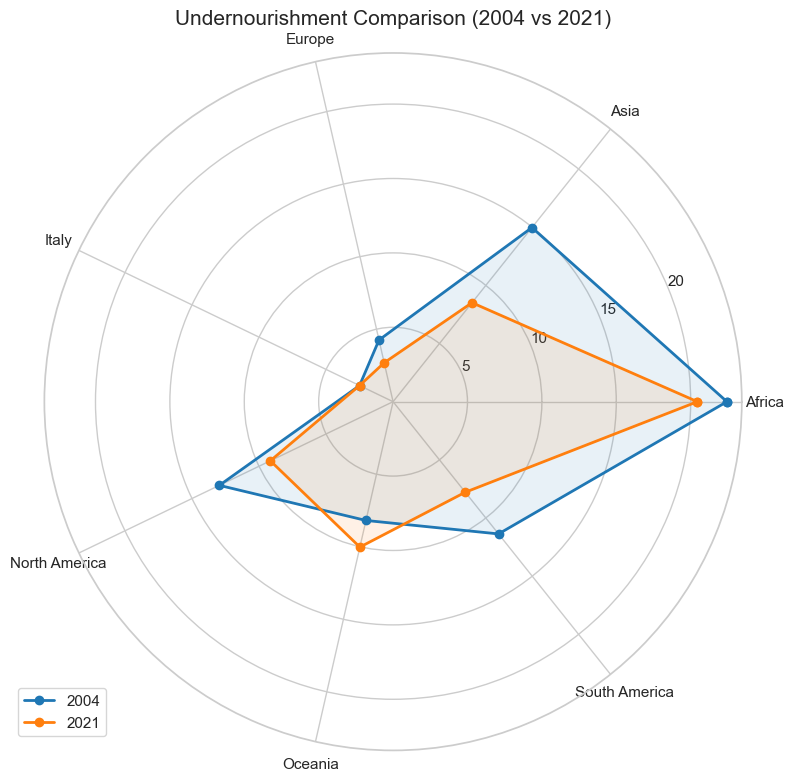

In [29]:
# Get data for specific years (e.g., 2004 and 2021 for comparison)
years_to_compare = [2004, 2021]
radar_data = combined_data[combined_data['Year'].isin(years_to_compare)]

# Pivot the data for radar chart
radar_pivot = radar_data.pivot(index='Year', 
                               columns='Continent', 
                               values='Prevalence of undernourishment (% of population)')

# Create radar chart
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)

# Set the angles for each continent
continents = radar_pivot.columns.tolist()
N = len(continents)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Plot each year
colors = ['#1f77b4', '#ff7f0e']  # Blue for 2004, Orange for 2021
for i, year in enumerate(years_to_compare):
    values = radar_pivot.loc[year].tolist()
    values += values[:1]  # Close the loop
    
    # Plot values
    ax.plot(angles, values, 'o-', linewidth=2, color=colors[i], label=str(year))
    ax.fill(angles, values, alpha=0.1, color=colors[i])

# Set labels and styling
ax.set_xticks(angles[:-1])
ax.set_xticklabels(continents)
ax.set_title('Undernourishment Comparison (2004 vs 2021)', size=15)
ax.grid(True)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

# Demography

## Fertility rate, total (births per woman)
For all the continents, no missing values in 2004-2020 . For all the continents, missing values in 2021-22-23 . in Europe there are 3 missing value in other years too (Andorra, Monaco, San Marino). in Oceania there is 1 missing value in other years too (in Palau) .

In [30]:
fert= ['Country Name', 'Continent', 'Year','Fertility rate, total (births per woman)']
df_fert = df[fert]
df_fert.head()

df_fertupd= df_fert[(df_fert['Year'] >= 2004) & (df_fert['Year'] <= 2020)]

C:\Users\Pancione\AppData\Local\Temp\ipykernel_31520\3554063683.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_for_plot['Continent'] = 'Italy'


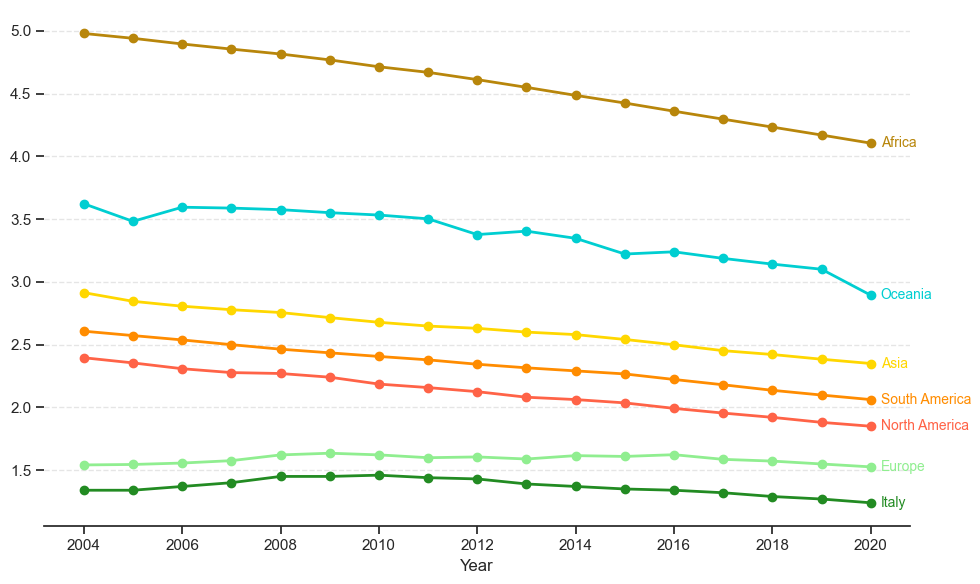

In [48]:
# Filter for Italy
italy_data = df_fertupd[df_fertupd['Country Name'] == 'Italy']

# Group by Continent and Year, and calculate mean for each continent
continent_data = df_fertupd.groupby(['Continent', 'Year']).agg({'Fertility rate, total (births per woman)': 'mean'}).reset_index()

# Prepare Italy data for plotting
italy_for_plot = italy_data[['Year', 'Fertility rate, total (births per woman)']]
italy_for_plot['Continent'] = 'Italy'

# Combine Italy with continent data
plot_data = pd.concat([
    continent_data, 
    italy_for_plot[['Continent', 'Year', 'Fertility rate, total (births per woman)']]
])

# Create the plot
plt.figure(figsize=(10, 6))
# Rimuove gli spigoli
sns.set_style("ticks")  # meno invadente di "whitegrid"

# Define colors
colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

# Plot each continent and Italy
for continent in plot_data['Continent'].unique():
    cont_data = plot_data[plot_data['Continent'] == continent].sort_values('Year')
    
    # Plot with points at each year
    plt.plot(cont_data['Year'], 
             cont_data['Fertility rate, total (births per woman)'],
             'o-',  # Line with circle markers
             linewidth=2,
             color=colors.get(continent, 'gray'))
    
    # Add the continent name at the end of each line
    if not cont_data.empty:
        last_valid = cont_data.dropna(subset=['Fertility rate, total (births per woman)']).iloc[-1]
        plt.text(last_valid['Year'] + 0.2, 
                last_valid['Fertility rate, total (births per woman)'], 
                continent, 
                fontsize=10, 
                color=colors.get(continent, 'gray'),
                verticalalignment='center')

# Clean labels
plt.title('', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.xticks(range(2004, 2021, 2))

# Solo griglia orizzontale
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Rimuove solo i bordi laterali e in alto, mantiene quello in basso (asse x)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)  # Mantiene la linea dell’asse X

plt.tight_layout()
plt.show()

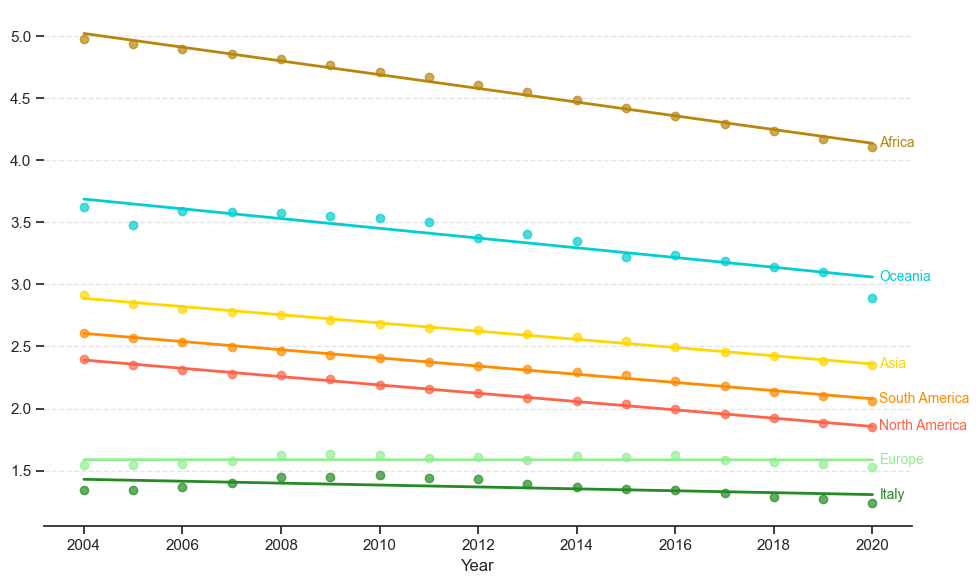

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepara i dati
italy_data = df_fertupd[df_fertupd['Country Name'] == 'Italy']
continent_data = df_fertupd.groupby(['Continent', 'Year']).agg(
    {'Fertility rate, total (births per woman)': 'mean'}
).reset_index()

italy_for_plot = italy_data[['Year', 'Fertility rate, total (births per woman)']].copy()
italy_for_plot['Continent'] = 'Italy'

plot_data = pd.concat([
    continent_data,
    italy_for_plot[['Continent', 'Year', 'Fertility rate, total (births per woman)']]
])

# Colori personalizzati
colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

# Inizio del plot
plt.figure(figsize=(10, 6))
sns.set_style("ticks")
ax = plt.gca()

# Ciclo su ogni continente / Italia
for continent in plot_data['Continent'].unique():
    cont_data = plot_data[plot_data['Continent'] == continent].dropna()
    cont_data = cont_data.sort_values('Year')
    
    # Scatter dei punti
    ax.scatter(cont_data['Year'],
               cont_data['Fertility rate, total (births per woman)'],
               color=colors.get(continent, 'gray'),
               alpha=0.7)
    
    # Regressione lineare
    X = cont_data['Year'].values.reshape(-1, 1)
    y = cont_data['Fertility rate, total (births per woman)'].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    ax.plot(cont_data['Year'], y_pred,
            color=colors.get(continent, 'gray'),
            linewidth=2)
    
    # Etichetta a fine linea
    last_year = cont_data['Year'].max()
    last_value = y_pred[-1]
    ax.annotate(continent,
                xy=(last_year, last_value),
                xytext=(5, 0),
                textcoords='offset points',
                color=colors.get(continent, 'gray'),
                fontsize=10,
                va='center')

# Pulizia grafico
ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(range(2004, 2021, 2))

# Solo griglia orizzontale
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Rimuovi tutti i bordi tranne quello in basso (asse X)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

plt.tight_layout()
plt.show()

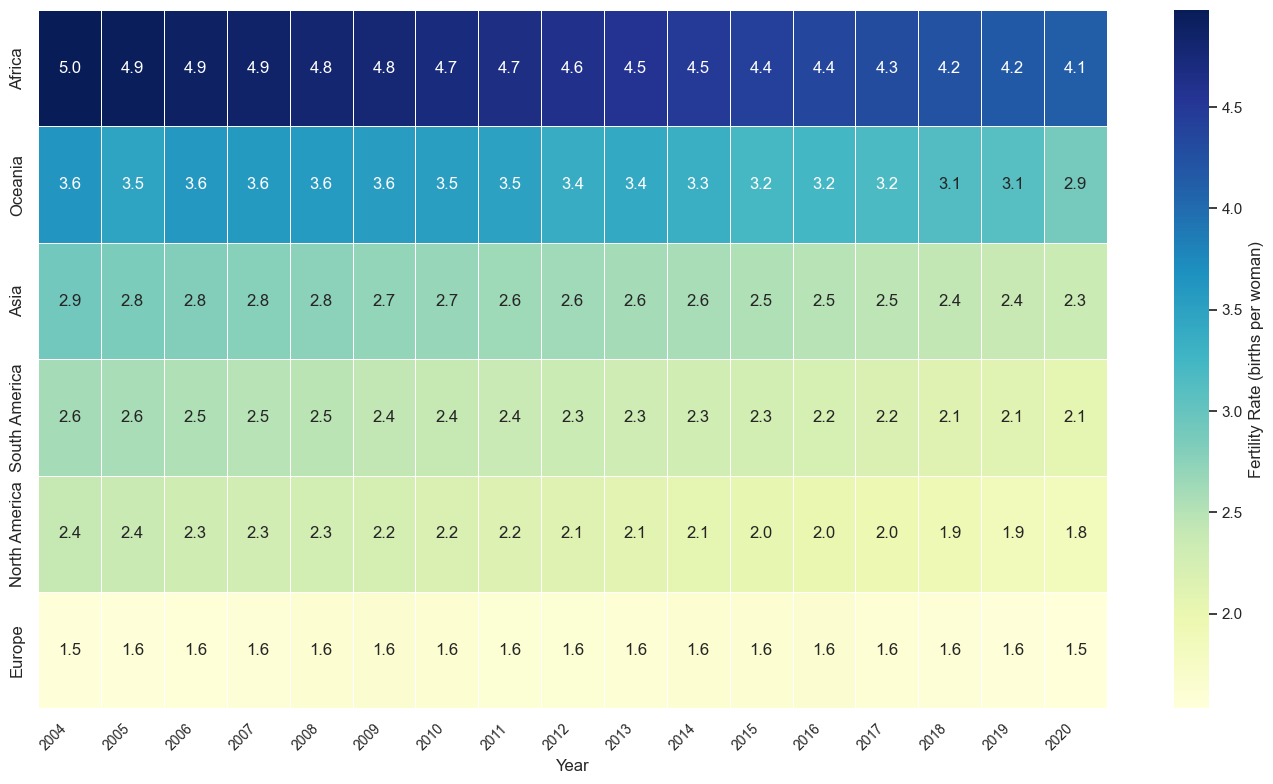

In [32]:
# Group by Continent and Year for all other countries
continent_data = df_fertupd[df_fertupd['Country Name'] != 'Italy'].groupby(['Continent', 'Year']).agg({
    'Fertility rate, total (births per woman)': 'mean'
}).reset_index()

# Pivot the data for the heatmap
heatmap_data = continent_data.pivot(
    index='Continent', 
    columns='Year', 
    values='Fertility rate, total (births per woman)'
)

# Calculate the average fertility rate for each continent/region to sort by
# Sort in descending order (highest values first)
avg_fertility = heatmap_data.mean(axis=1).sort_values(ascending=False)

# Reorder the heatmap data based on descending average values
heatmap_data = heatmap_data.reindex(avg_fertility.index)

# Create the heatmap
fig, ax = plt.subplots(figsize=(14, 8))

# Custom colormap from light to dark blue
cmap = plt.cm.YlGnBu

# Create the heatmap with annotations
heatmap = sns.heatmap(
    heatmap_data, 
    annot=True,                   # Show values in cells
    fmt=".1f",                    # Format to 1 decimal place
    cmap=cmap,                    # Use our custom colormap
    linewidths=0.5,               # Add lines between cells
    ax=ax,                        # Use our axis
    cbar_kws={'label': 'Fertility Rate (births per woman)'}  # Label for colorbar
)

# Improve labels and title
ax.set_title('', fontsize=16, pad=20)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('', fontsize=12)  # Remove y-axis label as it's redundant

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Get the continent names
continents = heatmap_data.index.tolist()
num_continents = len(continents)

# For even spacing, calculate the positions
positions = np.arange(0, num_continents) + 0.5  # Center of each cell

# Set y-ticks and labels
ax.set_yticks(positions)
ax.set_yticklabels(continents, fontsize=12, va='center')

# Adjust layout
plt.tight_layout()
plt.savefig('fertilityrateheatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
# Filter data for just the start and end years
start_year = 2004
end_year = 2020

# Get data for start and end years
start_data = combined_data[combined_data['Year'] == start_year].copy()
end_data = combined_data[combined_data['Year'] == end_year].copy()

# Merge data for both years
slope_data = pd.merge(
    start_data[['Continent', 'Fertility rate, total (births per woman)']],
    end_data[['Continent', 'Fertility rate, total (births per woman)']],
    on='Continent', 
    suffixes=('_start', '_end')
)

# Calculate change
slope_data['change'] = slope_data['Fertility rate, total (births per woman)_end'] - slope_data['Fertility rate, total (births per woman)_start']
slope_data['percent_change'] = (slope_data['change'] / slope_data['Fertility rate, total (births per woman)_start']) * 100

# Sort by end values
slope_data = slope_data.sort_values('Fertility rate, total (births per woman)_end', ascending=False)

# Create the plot
plt.figure(figsize=(10, 8))

# Set up x positions
x1, x2 = 0, 1

# Define colors based on change
def get_color(change):
    if change < -0.1:
        return '#d7301f'  # Red for significant decrease
    elif change > 0.1:
        return '#1a9850'  # Green for significant increase
    else:
        return '#7570b3'  # Purple for stable

# Plot the lines
for i, row in slope_data.iterrows():
    # Get start and end values
    start_val = row['Fertility rate, total (births per woman)_start']
    end_val = row['Fertility rate, total (births per woman)_end']
    change = row['change']
    
    # Plot line
    color = get_color(change)
    plt.plot([x1, x2], [start_val, end_val], '-', color=color, alpha=0.7, linewidth=2)
    
    # Add points
    plt.plot(x1, start_val, 'o', color=color, markersize=8)
    plt.plot(x2, end_val, 'o', color=color, markersize=8)
    
    # Add continent label on the right
    plt.text(x2 + 0.05, end_val, row['Continent'], fontsize=12, va='center')
    
    # Add values
    plt.text(x1 - 0.05, start_val, f"{start_val:.1f}", fontsize=10, ha='right', va='center')
    plt.text(x2 + 0.02, end_val, f"{end_val:.1f}", fontsize=10, ha='left', va='center')
    
    # Add percent change as a small label near the middle of the line
    plt.text(0.5, (start_val + end_val)/2, f"{row['percent_change']:.1f}%", 
             fontsize=9, ha='center', va='bottom' if change > 0 else 'top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

# Set axis labels
plt.xticks([x1, x2], [str(start_year), str(end_year)], fontsize=14)
plt.xlim(-0.2, 1.3)

# Set grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Set title
plt.title('', fontsize=16, pad=20)
plt.ylabel('Fertility Rate (births per woman)', fontsize=14)

# Add legend for colors
handles = [
    plt.Line2D([0], [0], color='#d7301f', lw=2),
    plt.Line2D([0], [0], color='#7570b3', lw=2),
    plt.Line2D([0], [0], color='#1a9850', lw=2)
]
labels = ['Decreasing', 'Stable', 'Increasing']
plt.legend(handles, labels, title='Trend', loc='upper right')

plt.tight_layout()
plt.savefig('fertilitypercentchange.png', dpi=300, bbox_inches='tight')
plt.show()

KeyError: "['Fertility rate, total (births per woman)'] not in index"

In [ ]:
import matplotlib.patches as mpatches

# Filter data for Italy
italy_data = df_fertupd[df_fertupd['Country Name'] == 'Italy']

# Create a dataframe with Italy's values by year
italy_by_year = italy_data.set_index('Year')['Fertility rate, total (births per woman)']

# Group by Continent and Year to get continental averages
continent_data = df_fertupd.groupby(['Continent', 'Year']).agg({
    'Fertility rate, total (births per woman)': 'mean'
}).reset_index()

# Create a new dataframe to store the differences
diff_data = []

# Calculate difference for each continent and year
for continent in continent_data['Continent'].unique():
    cont_years = continent_data[continent_data['Continent'] == continent]
    
    for _, row in cont_years.iterrows():
        year = row['Year']
        cont_value = row['Fertility rate, total (births per woman)']
        
        if year in italy_by_year.index:
            italy_value = italy_by_year.loc[year]
            
            diff_data.append({
                'Continent': continent,
                'Year': year,
                'Continent_Value': cont_value,
                'Italy_Value': italy_value,
                'Difference': cont_value - italy_value
            })

diff_df = pd.DataFrame(diff_data)

# Create the plot with white background for better contrast
plt.figure(figsize=(14, 10), facecolor='white')

# Define more vibrant colors for better visibility
palette = {
    'Africa': '#FF3030',      # Bright red
    'Asia': '#FF8C00',        # Dark orange
    'Oceania': '#FFD700',     # Gold
    'South America': '#00BFFF', # Deep sky blue
    'North America': '#1E90FF', # Dodger blue
    'Europe': '#4169E1'       # Royal blue
}

# Plot each continent's difference from Italy
for continent in diff_df['Continent'].unique():
    cont_data = diff_df[diff_df['Continent'] == continent]
    
    # Plot the line
    plt.plot(cont_data['Year'], cont_data['Difference'], 
             'o-', linewidth=3, markersize=8,
             color=palette.get(continent, 'gray'))
    
    # Add continent name directly at the end of each line with enhanced visibility
    last_year_data = cont_data[cont_data['Year'] == cont_data['Year'].max()]
    if not last_year_data.empty:
        last_x = last_year_data['Year'].iloc[0]
        last_y = last_year_data['Difference'].iloc[0]
        
        # Position the text slightly offset from the end of the line
        text_x = last_x + 0.2
        text_y = last_y
        
        # Add the continent name with matching color, bold text, and a contrasting background
        plt.text(text_x, text_y, continent, 
                 color=palette.get(continent, 'gray'),
                 fontsize=14, fontweight='bold', va='center',
                 bbox=dict(facecolor='white', alpha=0.9, edgecolor=palette.get(continent, 'gray'), 
                           boxstyle='round,pad=0.3', linewidth=2))

# Add a horizontal line at 0 (Italy's baseline) with more emphasis
plt.axhline(y=0, color='black', linestyle='-', linewidth=3, alpha=0.9)

# Add Italy label with more emphasis
plt.text(2020.2, 0, 'Italy', fontsize=16, fontweight='bold', va='center', 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.9))

# Define shaded regions with more distinct colors
regions = [
    {"range": (2, 6), "color": "#FFCCCC", "label": "Much higher than Italy"},  # Light red
    {"range": (0.5, 2), "color": "#FFE5CC", "label": "Higher than Italy"},     # Light orange
    {"range": (-0.5, 0.5), "color": "#CCFFCC", "label": "Similar to Italy"},   # Light green
    {"range": (-2, -0.5), "color": "#CCE5FF", "label": "Lower than Italy"}     # Light blue
]

# Create shaded regions
for region in regions:
    plt.axhspan(region["range"][0], region["range"][1], alpha=0.3, color=region["color"])

# Customize the plot
plt.title('', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Difference in Fertility Rate (Continental Average - Italy)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotations for key observations
max_diff = diff_df.groupby('Continent')['Difference'].max()
max_continent = max_diff.idxmax()
max_year = diff_df[(diff_df['Continent'] == max_continent) & 
                  (diff_df['Difference'] == max_diff.max())]['Year'].values[0]

plt.annotate(f"{max_continent} has the largest gap\n({max_diff.max():.1f} higher than Italy)",
           xy=(max_year, max_diff.max()),
           xytext=(max_year - 2, max_diff.max() + 0.5),
           arrowprops=dict(arrowstyle='->', color='black', linewidth=2),
           fontsize=14, fontweight='bold', ha='center',
           bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="black", alpha=0.9))

# Add explanation for Europe
europe_latest = diff_df[(diff_df['Continent'] == 'Europe') & 
                       (diff_df['Year'] == diff_df['Year'].max())]['Difference'].values[0]

plt.annotate(f"Europe average: {europe_latest:.2f} different from Italy",
           xy=(2020, europe_latest),
           xytext=(2015, europe_latest + 0.3),
           arrowprops=dict(arrowstyle='->', color='black', linewidth=2),
           fontsize=14, ha='center',
           bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="black", alpha=0.9))

# Set axis limits
plt.xlim(2004, 2021)
y_min = diff_df['Difference'].min() - 0.5
y_max = diff_df['Difference'].max() + 0.5
plt.ylim(y_min, y_max)




# Add specialized markers along Italy's line to make it more visible
years = range(2004, 2021, 2)  # Every 2 years
for year in years:
    plt.plot(year, 0, 'o', color='black', markersize=7, alpha=0.8)  # Black dots along Italy's line

# Add a special marker for Italy's beginning and end points
plt.plot(2004, 0, 's', color='black', markersize=10)  # Square at start
plt.plot(2020, 0, 's', color='black', markersize=10)  # Square at end

# Add contextual annotation about what the differences mean
plt.figtext(0.5, 0.01, 
          "",
          ha='center', fontsize=12, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to make room for the legend
plt.savefig('fertilityrategap.png', dpi=300, bbox_inches='tight')
plt.show()

## Life expectancy at birth, total (years)
Africa, Asia, Europe, NA, Oceania, SA, no missing values in 2004-2020 . Africa, Asia, Europe, NA, Oceania, SA, missing values in 2021-22-23 . in Europe there are 3 missing value in other years too (Andorra, Monaco, San Marino). in Oceania there is 1 missing value in other years too (in Palau) .

In [ ]:
life_exp= ['Country Name', 'Continent', 'Year','Life expectancy at birth, total (years)']
df_life_exp = df[life_exp]
df_life_exp.head()

df_le0420= df_life_exp[(df_life_exp['Year'] >= 2004) & (df_life_exp['Year'] <= 2020)]

In [ ]:
# Filter data for Italy
italy_data = df_le0420[df_le0420['Country Name'] == 'Italy']

# Group by Continent and Year for averages
continent_data = df_le0420.groupby(['Continent', 'Year']).agg({
    'Life expectancy at birth, total (years)': 'mean'
}).reset_index()

# Create simple plot
plt.figure(figsize=(10, 6))

# Define colors for each continent
colors = {
    'Africa': '#FF8C00',      # Dark orange
    'Asia': '#4682B4',        # Steel blue
    'Europe': '#228B22',      # Forest green
    'North America': '#9370DB', # Medium purple
    'South America': '#20B2AA', # Light sea green
    'Oceania': '#CD5C5C',     # Indian red
    'Italy': '#FF0000'        # Bright red
}

# Get all end values to help with positioning labels
end_values = []
for continent in continent_data['Continent'].unique():
    cont_data = continent_data[continent_data['Continent'] == continent]
    last_year = cont_data['Year'].max()
    last_value = cont_data[cont_data['Year'] == last_year]['Life expectancy at birth, total (years)'].values[0]
    end_values.append((continent, last_value))

# Add Italy to the list
last_year_italy = italy_data['Year'].max()
last_value_italy = italy_data[italy_data['Year'] == last_year_italy]['Life expectancy at birth, total (years)'].values[0]
end_values.append(('Italy', last_value_italy))

# Sort by value to help with label positioning
sorted_end_values = sorted(end_values, key=lambda x: x[1])

# Plot each continent
for continent in continent_data['Continent'].unique():
    cont_data = continent_data[continent_data['Continent'] == continent]
    
    # Use consistent color from dictionary
    color = colors.get(continent, 'gray')
    
    # Plot line with markers at each point
    plt.plot(cont_data['Year'], cont_data['Life expectancy at birth, total (years)'],
             'o-',  # Line with circle markers
             linewidth=2,
             color=color)

# Plot Italy with thicker line and markers using its color from dictionary
plt.plot(italy_data['Year'], italy_data['Life expectancy at birth, total (years)'],
         'o-',  # Line with circle markers
         linewidth=3, 
         color=colors['Italy'])

# Now add labels with vertical staggering to prevent overlapping
# Calculate minimum vertical distance between labels
min_distance = 0.6
previous_y = -float('inf')
vertical_shift = 0

# For each continent, based on sorted values
for i, (continent, value) in enumerate(sorted_end_values):
    # Decide if we need a vertical shift
    if i > 0 and value - previous_y < min_distance:
        vertical_shift += min_distance - (value - previous_y)
    else:
        vertical_shift = 0
    
    # Apply the shift
    text_y = value + vertical_shift
    previous_y = text_y
    
    # Select the color
    color = colors.get(continent, 'gray')
    
    # Add text with proper positioning
    plt.text(2020.2, text_y, 
             continent, 
             fontsize=10, 
             color=color,
             fontweight='bold' if continent == 'Italy' else 'normal',
             va='center')
    
    # Add a small line connecting the label to the actual data point if shifted
    if vertical_shift > 0:
        if continent == 'Italy':
            actual_value = last_value_italy
        else:
            actual_value = continent_data[(continent_data['Continent'] == continent) & 
                                         (continent_data['Year'] == 2020)]['Life expectancy at birth, total (years)'].values[0]
        
        plt.plot([2020, 2020.1], [actual_value, text_y], 
                 color=color, linestyle='-', linewidth=0.5)

# Add labels and title
plt.title('Life Expectancy: Italy vs Continental Averages (2004-2020)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.grid(True, alpha=0.3)

# Set x-axis to show whole year numbers
plt.xticks(range(2004, 2021))  # This sets ticks at each year from 2004 to 2020

# Add a bit more space on the right for the labels
plt.xlim(2004, 2022)

plt.tight_layout()
plt.show()

In [ ]:
# Get data for the first and last years
start_year = 2004
end_year = 2020

# Filter data for start and end years
start_data = combined_data[combined_data['Year'] == start_year]
end_data = combined_data[combined_data['Year'] == end_year]

# Create DataFrames with continent as index
start_df = start_data.set_index('Continent')['Life expectancy at birth, total (years)']
end_df = end_data.set_index('Continent')['Life expectancy at birth, total (years)']

# Calculate absolute and percentage change
abs_change = end_df - start_df
pct_change = ((end_df - start_df) / start_df * 100)

# Create a combined DataFrame
combined_df = pd.DataFrame({
    'Start_Value': start_df,
    'End_Value': end_df,
    'Absolute_Change': abs_change,
    'Percent_Change': pct_change
})

# Sort by absolute change
combined_df = combined_df.sort_values('Absolute_Change', ascending=False)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create horizontal bars for absolute change
bars = ax.barh(combined_df.index, combined_df['Absolute_Change'], 
              color='skyblue', edgecolor='navy', alpha=0.7)

# Customize with Italy as a different color
italy_idx = np.where(combined_df.index == 'Italy')[0]
if len(italy_idx) > 0:
    bars[italy_idx[0]].set_color('#2E8B57')  # Sea green for Italy
    bars[italy_idx[0]].set_alpha(0.9)
    bars[italy_idx[0]].set_edgecolor('darkgreen')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    label_x_pos = width + 0.1
    
    # Add absolute change
    ax.text(label_x_pos, i, f"+{width:.1f} years", 
            va='center', fontsize=11, fontweight='bold')
    
    # Add percentage change in parentheses
    ax.text(label_x_pos, i - 0.25, f"({combined_df['Percent_Change'].iloc[i]:.1f}%)", 
            va='center', fontsize=10, color='gray')
    
    # Add start and end values
    ax.text(0, i + 0.25, f"{combined_df['Start_Value'].iloc[i]:.1f} → {combined_df['End_Value'].iloc[i]:.1f} years", 
            va='center', ha='left', fontsize=9, color='navy')

# Set chart title and labels
ax.set_title('Improvement in Life Expectancy (2004-2020)', fontsize=16, fontweight='bold')
ax.set_xlabel('Increase in Years', fontsize=14)
ax.set_ylabel('')

# Add grid for readability
ax.grid(axis='y', linestyle='', alpha=0.6)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a note about data sources
plt.figtext(0.5, 0.01, 
            '',
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

## Population ages 65 and above (% of total population)
For all the continents, no missing values in 2004-2020. For all the continents, missing values in 2021-22-23 . In Africa there's 1 missing value in 2012-20 (Eritrea).

In [ ]:
# First, let's extract the data for population ages 65 and above
pop_65 = ['Country Name', 'Continent', 'Year', 'Population ages 65 and above (% of total population)']
df_pop65 = df[pop_65]
df_pop65_0420 = df_pop65[(df_pop65['Year'] >= 2004) & (df_pop65['Year'] <= 2020)]

# Filter data for Italy
italy_data = df_pop65_0420[df_pop65_0420['Country Name'] == 'Italy']

# Group by Continent and Year for averages
continent_data = df_pop65_0420.groupby(['Continent', 'Year']).agg({
    'Population ages 65 and above (% of total population)': 'mean'
}).reset_index()

In [ ]:

# Extract data with the correct column name
elderly_column = 'Population ages 65 and above (% of total population)'  # Adjust if needed

# Extract data
pop_65 = ['Country Name', 'Continent', 'Year', elderly_column]
df_pop65 = df[pop_65]
df_pop65_0420 = df_pop65[(df_pop65['Year'] >= 2004) & (df_pop65['Year'] <= 2020)]

# Filter data for Italy
italy_data = df_pop65_0420[df_pop65_0420['Country Name'] == 'Italy']

# Group by Continent and Year for averages
continent_data = df_pop65_0420.groupby(['Continent', 'Year']).agg({
    elderly_column: 'mean'
}).reset_index()

# Create figure
plt.figure(figsize=(12, 7))

# Define colors for better distinction
colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

# Set x-axis ticks every 2 years
start_year = int(df_pop65_0420['Year'].min())
end_year = int(df_pop65_0420['Year'].max())
years_every_two = np.arange(start_year, end_year + 1, 2)
plt.xticks(ticks=years_every_two, rotation=0)


# Plot each continent
for continent in continent_data['Continent'].unique():
    cont_data = continent_data[continent_data['Continent'] == continent]
    
    # Check if values need to be multiplied by 100
    values = cont_data[elderly_column].values
    if max(values) < 1:  # If values are in decimal format (0-1)
        values = values * 100  # Convert to percentage
    
    # Plot with markers at each year
    plt.plot(cont_data['Year'], values,
             'o-',  # Line with circle markers
             linewidth=2,
             color=colors.get(continent, 'gray'))
    
    # Add continent name at the end of the line
    last_year = cont_data['Year'].max()
    last_value = values[-1]  # Last value after potential conversion
    
    plt.text(last_year + 0.3, last_value, 
             continent, 
             fontsize=12, 
             color=colors.get(continent, 'gray'),
             va='center')

# Plot Italy
italy_values = italy_data[elderly_column].values
if max(italy_values) < 1:  # If values are in decimal format
    italy_values = italy_values * 100

plt.plot(italy_data['Year'], italy_values,
         'o-',  # Line with circle markers
         linewidth=3, 
         color=colors['Italy'])

# Add Italy label at the end of its line
last_year_italy = italy_data['Year'].max()
last_value_italy = italy_values[-1]

plt.text(last_year_italy + 0.3, last_value_italy, 
         'Italy', 
         fontsize=12, 
         fontweight='bold',
         color=colors['Italy'],
         va='center')

# Add labels and title
plt.title('', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Total Population (%)', fontsize=14)
plt.grid(True, alpha=0.3)



# Add some padding on the right for labels
plt.xlim(2004, 2022)

# Remove legend as requested
# plt.legend()
plt.savefig('elderly_pop trend.png', dpi=300, bbox_inches='tight')
# Save figure with padding
plt.show()

In [ ]:
# Extract data for elderly population
elderly_column = 'Population ages 65 and above (% of total population)'  # Adjust if needed
pop_65 = ['Country Name', 'Continent', 'Year', elderly_column]
df_pop65 = df[pop_65]

# Filter for the year range (2004-2020)
df_filtered = df_pop65[(df_pop65['Year'] >= 2004) & (df_pop65['Year'] <= 2020)]

# First, calculate yearly averages for each continent
yearly_continent_avg = df_filtered.groupby(['Continent', 'Year'])[elderly_column].mean().reset_index()

# Then, calculate the average of these yearly averages for each continent
continent_avg = yearly_continent_avg.groupby('Continent')[elderly_column].mean().reset_index()

# Similarly for Italy: first get yearly values, then average them
italy_yearly = df_filtered[df_filtered['Country Name'] == 'Italy'].groupby('Year')[elderly_column].mean()
italy_data = italy_yearly.mean()  # Average across all years

# Add Italy to the dataframe
italy_row = pd.DataFrame({'Continent': ['Italy'], elderly_column: [italy_data]})
combined_data = pd.concat([continent_avg, italy_row], ignore_index=True)

# Convert to percentage if needed
if combined_data[elderly_column].max() < 1:
    combined_data[elderly_column] = combined_data[elderly_column] * 100

# Sort by percentage in descending order
combined_data = combined_data.sort_values(by=elderly_column, ascending=False)

# Calculate global average as average of continental averages (excluding Italy)
continent_only = combined_data[combined_data['Continent'] != 'Italy']
global_avg = continent_only[elderly_column].mean()

# Create horizontal bar chart
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Custom colors
colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

# Create bars
bars = plt.barh(combined_data['Continent'], 
               combined_data[elderly_column],
               color=[colors.get(cont, 'gray') for cont in combined_data['Continent']])

# Add data labels
for i, bar in enumerate(bars):
    value = bar.get_width()
    plt.text(value + 0.5, i, f"{value:.1f}%",
             ha='left', va='center', fontsize=11, fontweight='bold', color='dimgray')

# Format the chart
plt.title('', fontsize=15, color='gray', pad=20)
plt.xlabel('', color='gray')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Set x-ticks
max_val = combined_data[elderly_column].max()
plt.xlim(0, max_val * 1.15)  # Add some space for labels
plt.xticks(color='dimgray')

# Set y-ticks
plt.yticks(fontsize=12, color='dimgray')

# Add a vertical line at global average
plt.axvline(x=global_avg, color='black', linestyle='--', alpha=0.7)
plt.text(global_avg + 0.2, -0.6, f'Continental average: {global_avg:.1f}%', 
         color='black', fontsize=13, va='bottom')

# Calculate and display Italy's relation to global average
italy_value = combined_data[combined_data['Continent'] == 'Italy'][elderly_column].values[0]
italy_position = list(combined_data['Continent']).index('Italy')

ratio = italy_value / global_avg

# Add annotation about Italy's position
plt.annotate(
    f"Italy's average elderly population\n({italy_value:.1f}%) is {ratio:.1f}x\nthe continental average",
    xy=(italy_value/1.25, italy_position),
    xytext=(italy_value/1, italy_position +0.7),
    arrowprops=dict(arrowstyle='->', color='forestgreen', lw=1.5),
    fontsize=11, color='forestgreen', ha='center',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="forestgreen", alpha=0.8)
)

plt.tight_layout()
plt.savefig('elderly_population_avg_all_years_two_step.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Extract data for elderly population
elderly_column = 'Population ages 65 and above (% of total population)'  # Adjust if needed
pop_65 = ['Country Name', 'Continent', 'Year', elderly_column]
df_pop65 = df[pop_65]

# Filter to just 2004 and 2020 (start and end years)
df_endpoints = df_pop65[(df_pop65['Year'] == 2004) | (df_pop65['Year'] == 2020)]

# Filter data for Italy
italy_data = df_endpoints[df_endpoints['Country Name'] == 'Italy'].copy()
italy_data['Region'] = 'Italy'  # Add a region column for merging

# Calculate continental averages
continent_data = df_endpoints.groupby(['Continent', 'Year'])[elderly_column].mean().reset_index()
continent_data = continent_data.rename(columns={'Continent': 'Region'})  # Rename for consistency

# Combine Italy and continent data
combined_data = pd.concat([continent_data, italy_data[['Region', 'Year', elderly_column]]])

# Convert to percentage if needed
if combined_data[elderly_column].max() < 1:
    combined_data[elderly_column] = combined_data[elderly_column] * 100

# Pivot the data to get start and end values in separate columns
pivot_data = combined_data.pivot(index='Region', columns='Year', values=elderly_column)

# Calculate change metrics
pivot_data['Absolute Change'] = pivot_data[2020] - pivot_data[2004]
pivot_data['Percent Change'] = (pivot_data['Absolute Change'] / pivot_data[2004]) * 100

# Reset index to get Region as a column
plot_data = pivot_data.reset_index()

# Sort by 2020 values (descending)
plot_data = plot_data.sort_values(2020, ascending=False)

# Create figure
plt.figure(figsize=(12, 10))
ax = plt.gca()

# Custom colors
colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

# Set positions for start and end years
start_x = 0
end_x = 1

# Draw lines connecting 2004 and 2020 values
for _, row in plot_data.iterrows():
    region = row['Region']
    start_val = row[2004]
    end_val = row[2020]
    change = end_val - start_val
    
    # Line color and style based on region
    color = colors.get(region, 'gray')
    linewidth = 3 if region == 'Italy' else 2
    alpha = 1.0 if region == 'Italy' else 0.8
    
    # Draw the connecting line
    plt.plot([start_x, end_x], [start_val, end_val], 
             '-', color=color, linewidth=linewidth, alpha=alpha)
    
    # Add dots at start and end
    plt.scatter(start_x, start_val, s=100, color=color, zorder=5, edgecolor='white')
    plt.scatter(end_x, end_val, s=100, color=color, zorder=5, edgecolor='white')

# Manually define positions for left side labels with more aggressive spacing
left_positions = {
    'Italy': None,        # Keep at actual position
    'Europe': None,       # Keep at actual position
    'North America': None,  # Increased offset
    'South America': -0.3, 
    'Asia': 0.3,            # Increased offse
    'Oceania': -0.3,      # Increased offset
    'Africa': None,       # Keep at actual position
}

# Add left side labels with manual adjustments
for _, row in plot_data.iterrows():
    region = row['Region']
    start_val = row[2004]
    color = colors.get(region, 'gray')
    
    # Apply manual adjustment if specified
    adjusted_y = start_val
    if left_positions[region] is not None:
        adjusted_y = start_val + left_positions[region]
        
        # Draw connector line for adjusted labels
        plt.plot([start_x - 0.02, start_x], [adjusted_y, start_val], 
                 '-', color=color, linewidth=0.5, alpha=0.7)
    
    # Add the label at the adjusted position
    plt.text(start_x - 0.05, adjusted_y, 
             f"{region}: {start_val:.1f}%", 
             ha='right', va='center', 
             fontweight='bold' if region == 'Italy' else 'normal',
             fontsize=11, color=color)

# Manually define positions for right side labels with more aggressive spacing
right_positions = {
    'Italy': None,        # Keep at actual position
    'Europe': None,       # Keep at actual position
    'North America': None, # Large upward adjustment
    'South America': None,  # Large downward adjustment
    'Asia': None,           # Larger downward adjustment
    'Oceania': None,         # Larger upward adjustment
    'Africa': None,       # Keep at actual position
}

# Add right side labels with manual adjustments
for _, row in plot_data.iterrows():
    region = row['Region']
    end_val = row[2020]
    color = colors.get(region, 'gray')
    
    # Apply manual adjustment if specified
    adjusted_y = end_val
    if right_positions[region] is not None:
        adjusted_y = end_val + right_positions[region]
        
        # Draw connector line for adjusted labels
        plt.plot([end_x, end_x + 0.02], [end_val, adjusted_y], 
                 '-', color=color, linewidth=0.5, alpha=0.7)
    
    # Add the label at the adjusted position
    plt.text(end_x + 0.05, adjusted_y, 
             f"{region}: {end_val:.1f}%", 
             ha='left', va='center', 
             fontweight='bold' if region == 'Italy' else 'normal',
             fontsize=11, color=color)

# Define manual positions for middle change labels to prevent overlap
# Use horizontal offsets to separate them
change_positions = {
    'Italy': {'x_offset': 0, 'y_offset': 0},       # No change needed
    'Europe': {'x_offset': 0, 'y_offset': 0},      # No change needed
    'North America': {'x_offset': 0, 'y_offset': 0.2},  # Shift left and up
    'South America': {'x_offset': 0, 'y_offset': -0.2},  # Shift right and down
    'Asia': {'x_offset': 0, 'y_offset': +0.3},          # Shift left and down
    'Oceania': {'x_offset': 0, 'y_offset': -0.3},         # Shift right and up
    'Africa': {'x_offset': 0, 'y_offset': 0},      # No change needed
}

# Add change annotations in the middle with adjusted positions
for _, row in plot_data.iterrows():
    region = row['Region']
    start_val = row[2004]
    end_val = row[2020]
    change = row['Absolute Change']
    color = colors.get(region, 'gray')
    
    # Get position adjustments
    x_offset = change_positions[region]['x_offset']
    y_offset = change_positions[region]['y_offset']
    
    # Calculate base position and apply offsets
    base_x = 0.5 + x_offset
    base_y = (start_val + end_val) / 2 + y_offset
    
    # Add the label at the adjusted position
    plt.text(base_x, base_y,
             f"+{change:.1f}",
             ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, alpha=0.7),
             fontsize=10, color=color, fontweight='bold')

# Add year labels at the bottom
plt.text(start_x, plot_data[2004].min() - 2, '2004', 
         ha='center', fontsize=14, fontweight='bold', color='dimgray')
plt.text(end_x, plot_data[2004].min() - 2, '2020', 
         ha='center', fontsize=14, fontweight='bold', color='dimgray')

# Add title
plt.title('Change in Population Ages 65 and Above (2004-2020)', fontsize=16, pad=20, color='gray')
plt.ylabel('Percentage of Total Population (%)', fontsize=14, color='gray')

# Set axis limits with more space for shifted labels
y_min = plot_data[2004].min() - 3  # Extra space for year labels
y_max = plot_data[2020].max() + 4  # Extra space at top for annotations
plt.ylim(y_min, y_max)
plt.xlim(-0.3, 1.3)  # Extra space on both sides for labels

# Remove x-axis ticks
plt.xticks([])

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Add light horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()

plt.show()

# Correlations

## People using safely managed drinking water services (% of population) and life expectancy

In [ ]:
# Filter for the two indicators we want to analyze
life_exp_col = 'Life expectancy at birth, total (years)'
water_access_col = 'People using safely managed drinking water services (% of population)'

# Create a new dataframe with just the data we need
correlation_df = df[['Country Name','Continent', 'Year', life_exp_col, water_access_col]].copy()

# Remove rows with missing values for either indicator
correlation_df = correlation_df.dropna(subset=[life_exp_col, water_access_col])

# Check the range of values for water access
print(f"Water access min: {correlation_df[water_access_col].min()}, max: {correlation_df[water_access_col].max()}")

# Convert to percentage if needed (if values are between 0-1)
if correlation_df[water_access_col].max() <= 1:
    correlation_df[water_access_col] = correlation_df[water_access_col] * 100
    print("Converted water access values to percentages")

# Calculate the correlation coefficient
correlation = correlation_df[life_exp_col].corr(correlation_df[water_access_col])
print(f"Correlation coefficient: {correlation:.4f}")

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=water_access_col, y=life_exp_col, data=correlation_df, scatter_kws={'alpha':0.5})
plt.title(f'Correlation between Access to Clean Water and Life Expectancy\nCorrelation: {correlation:.4f}', 
          fontsize=12)
plt.xlabel('Population with Access to Safe Drinking Water (%)')
plt.ylabel('Life Expectancy at Birth (years)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add text explaining the correlation
if correlation > 0.7:
    relationship = "Strong positive"
elif correlation > 0.5:
    relationship = "Moderate positive"
elif correlation > 0.3:
    relationship = "Weak positive"
elif correlation > -0.3:
    relationship = "Negligible"
else:
    relationship = "Negative"
    
plt.figtext(0.4, 0.88, f"{relationship} correlation detected", 
            bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('water_life_expectancy_correlation.png', dpi=300)
plt.show()

In [ ]:
# Let's also look at how this has changed over time - create a line plot by year
# First, calculate the average values by year
yearly_avg = correlation_df.groupby('Year')[[life_exp_col, water_access_col]].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot life expectancy on the first axis
line1 = ax1.plot(yearly_avg['Year'], yearly_avg[life_exp_col], 'b-', marker='o', label='Life Expectancy')
ax1.set_xlabel('Year')
ax1.set_ylabel('Life Expectancy (years)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot water access on the second axis
line2 = ax2.plot(yearly_avg['Year'], yearly_avg[water_access_col], 'r-', marker='s', 
                 label='Access to Safe Water')
ax2.set_ylabel('Population with Access to Safe Water (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title
plt.title('Trends in Life Expectancy and Access to Safe Drinking Water (2004-2023)')

# Add grid
ax1.grid(True, linestyle='--', alpha=0.7)

# Add legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='best')

plt.tight_layout()
plt.savefig('water_life_expectancy_trends.png', dpi=300)
plt.show()


In [ ]:
# Let's also check if there are distinct patterns by continent
# Assuming the dataset has a 'Continent' column
if 'Continent' in df.columns:
    # Create a scatter plot by continent
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=water_access_col, y=life_exp_col, data=correlation_df, 
                    hue='Continent', palette='tab10', alpha=0.7)
    plt.title('Relationship between Water Access and Life Expectancy by Continent')
    plt.xlabel('Population with Access to Safe Drinking Water (%)')
    plt.ylabel('Life Expectancy at Birth (years)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    plt.show()

In [ ]:
# Filter for Italy's data
italy_data = correlation_df[correlation_df['Country Name'] == 'Italy'].copy()

# Create an enhanced scatter plot highlighting Italy
plt.figure(figsize=(12, 8))

# Plot all data points in light blue with transparency
sns.regplot(x=water_access_col, y=life_exp_col, data=correlation_df, 
            scatter_kws={'alpha':0.4, 'color':'lightblue'}, 
            line_kws={'color':'blue'})

# Highlight Italy's data points in red
plt.scatter(italy_data[water_access_col], italy_data[life_exp_col], 
            color='red', s=100, label='Italy', zorder=5)

# Add data labels showing years for Italy's points
for idx, row in italy_data.iterrows():
    plt.annotate(str(int(row['Year'])), 
                 (row[water_access_col], row[life_exp_col]),
                 xytext=(7, 0), 
                 textcoords='offset points',
                 fontsize=9,
                 color='darkred')

# Add title and labels
plt.title(f'Correlation between Access to Clean Water and Life Expectancy\nCorrelation: {correlation:.4f}', 
          fontsize=14)
plt.xlabel('Population with Access to Safe Drinking Water (%)', fontsize=12)
plt.ylabel('Life Expectancy at Birth (years)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add text explaining the correlation
plt.figtext(0.15, 0.15, "Strong positive correlation detected", 
            bbox=dict(facecolor='white', alpha=0.8))

# Add Italy's average values
#italy_avg_water = italy_data[water_access_col].mean()
#italy_avg_life = italy_data[life_exp_col].mean()
#global_avg_water = correlation_df[water_access_col].mean()
#global_avg_life = correlation_df[life_exp_col].mean()

#plt.figtext(0.15, 0.10, 
#            f"Italy's average: {italy_avg_life:.1f} years, {italy_avg_water:.1f}% water access\n" +
#            f"Global average: {global_avg_life:.1f} years, {global_avg_water:.1f}% water access",
#            bbox=dict(facecolor='white', alpha=0.8))

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# List of indicators from your project description
indicators = [
    # Access to services
    'Access to clean fuels and technologies for cooking (% of population)',
    'Access to electricity (% of population)',
    'People using safely managed drinking water services (% of population)',
    'People using safely managed sanitation services (% of population)',
    # Poverty & inequality
    'Gini Index',
    'Poverty headcount ratio at national poverty lines (% of population)',
    # Health & Nutrition
    'Mortality rate, under-5 (per 1,000 live births)',
    'Prevalence of undernourishment (% of population)',
    # Demography
    'Fertility rate, total (births per woman)',
    'Life expectancy at birth, total (years)',
    'Population ages 65 and above (% of total population)',
    # Education
    'Government expenditure on education, total (% of government expenditure)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'School enrollment, primary (% gross)',
    # Employment
    'Children in employment, total (% of children ages 7-14)',
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)'
]

# Create a subset with just these indicators
indicators_df = df[['Country Name','Continent', 'Year'] + [col for col in indicators if col in df.columns]].copy()

# For percentage indicators stored as decimals (0-1), convert to percentages (0-100)
for col in indicators_df.columns:
    if '(% of' in col and indicators_df[col].max() <= 1:
        indicators_df[col] = indicators_df[col] * 100
        print(f"Converted {col} to percentage")

# Calculate the correlation matrix
corr_matrix = indicators_df.drop(['Country Name','Continent', 'Year'], axis=1).corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create the heatmap
plt.figure(figsize=(16, 14))
heatmap = sns.heatmap(
    corr_matrix, 
    mask=mask,
    annot=True,  # Show the correlation values
    fmt=".2f",   # Format to 2 decimal places
    cmap=cmap,   # Use the custom colormap
    vmin=-1,     # Minimum correlation value
    vmax=1,      # Maximum correlation value
    center=0,    # Center the colormap at zero
    square=True, # Make each cell square
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add a title
plt.title('Correlation Heatmap of ESG Indicators', fontsize=16, pad=20)

# Tight layout
plt.tight_layout()

# Save the figure
plt.savefig('esg_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Let's also create a simplified heatmap with shorter names for better readability
# Create a dictionary to map long indicator names to shorter ones
short_names = {
    'Access to clean fuels and technologies for cooking (% of population)': 'Clean Cooking Fuels',
    'Access to electricity (% of population)': 'Electricity Access',
    'People using safely managed drinking water services (% of population)': 'Safe Water Access',
    'People using safely managed sanitation services (% of population)': 'Sanitation Access',
    'Gini Index': 'Gini Index',
    'Poverty headcount ratio at national poverty lines (% of population)': 'Poverty Rate',
    'Mortality rate, under-5 (per 1,000 live births)': 'Under-5 Mortality',
    'Prevalence of undernourishment (% of population)': 'Undernourishment',
    'Fertility rate, total (births per woman)': 'Fertility Rate',
    'Life expectancy at birth, total (years)': 'Life Expectancy',
    'Population ages 65 and above (% of total population)': 'Elderly Population',
    'Government expenditure on education, total (% of government expenditure)': 'Education Expenditure',
    'Literacy rate, adult total (% of people ages 15 and above)': 'Literacy Rate',
    'School enrollment, primary (% gross)': 'Primary Enrollment',
    'Children in employment, total (% of children ages 7-14)': 'Child Employment',
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)': 'Labor Force Participation',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment Rate'
}

# Rename the columns and index of the correlation matrix
renamed_corr = corr_matrix.copy()
renamed_corr.columns = [short_names.get(col, col) for col in renamed_corr.columns]
renamed_corr.index = [short_names.get(idx, idx) for idx in renamed_corr.index]

# Create the simplified heatmap
plt.figure(figsize=(16, 14))
simplified_heatmap = sns.heatmap(
    renamed_corr, 
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

# Improve readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add a title
plt.title('Correlation Heatmap of ESG Indicators (Simplified)', fontsize=16, pad=20)

# Add grouping indicators with colored boxes
categories = {
    'Access to Services': ['Clean Cooking Fuels', 'Electricity Access', 'Safe Water Access', 'Sanitation Access'],
    'Poverty & Inequality': ['Gini Index', 'Poverty Rate'],
    'Health & Nutrition': ['Under-5 Mortality', 'Undernourishment'],
    'Demography': ['Fertility Rate', 'Life Expectancy', 'Elderly Population'],
    'Education': ['Education Expenditure', 'Literacy Rate', 'Primary Enrollment'],
    'Employment': ['Child Employment', 'Labor Force Participation', 'Unemployment Rate']
}

# Tight layout
plt.tight_layout()

# Save the figure
plt.savefig('esg_correlation_heatmap_simplified.png', dpi=300, bbox_inches='tight')
plt.show()

# For your specific correlation of interest, let's create a focused mini-heatmap
# Highlight correlations between Water Access and Life Expectancy
focused_indicators = [
    'Safe Water Access', 
    'Life Expectancy',
    'Electricity Access',  # Additional related indicators
    'Sanitation Access',
    'Under-5 Mortality'
]

focused_corr = renamed_corr.loc[focused_indicators, focused_indicators]

plt.figure(figsize=(10, 8))
focused_heatmap = sns.heatmap(
    focused_corr,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

plt.title('Focused Correlation Heatmap: Water Access & Life Expectancy', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
# List of indicators from your project description
indicators = [
    # Access to services
    'Access to clean fuels and technologies for cooking (% of population)',
    'Access to electricity (% of population)',
    'People using safely managed drinking water services (% of population)',
    'People using safely managed sanitation services (% of population)',
    # Poverty & inequality
    'Gini Index',
    'Poverty headcount ratio at national poverty lines (% of population)',
    # Health & Nutrition
    'Mortality rate, under-5 (per 1,000 live births)',
    'Prevalence of undernourishment (% of population)',
    # Demography
    'Fertility rate, total (births per woman)',
    'Life expectancy at birth, total (years)',
    'Population ages 65 and above (% of total population)',
    # Education
    'Government expenditure on education, total (% of government expenditure)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'School enrollment, primary (% gross)',
    # Employment
    'Children in employment, total (% of children ages 7-14)',
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)'
]

# Create a subset with just these indicators
indicators_df = df[['Country Name','Continent', 'Year'] + [col for col in indicators if col in df.columns]].copy()

# For percentage indicators stored as decimals (0-1), convert to percentages (0-100)
for col in indicators_df.columns:
    if '(% of' in col and indicators_df[col].max() <= 1:
        indicators_df[col] = indicators_df[col] * 100
        print(f"Converted {col} to percentage")

# Calculate the correlation matrix
corr_matrix = indicators_df.drop(['Country Name','Continent', 'Year'], axis=1).corr()

# Create a mask for the upper triangle
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create the heatmap
plt.figure(figsize=(16, 14))
heatmap = sns.heatmap(
    corr_matrix, 
    annot=True,  # Show the correlation values
    fmt=".2f",   # Format to 2 decimal places
    cmap=cmap,   # Use the custom colormap
    vmin=-1,     # Minimum correlation value
    vmax=1,      # Maximum correlation value
    center=0,    # Center the colormap at zero
    square=True, # Make each cell square
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add a title
plt.title('Correlation Heatmap of ESG Indicators', fontsize=16, pad=20)

# Tight layout
plt.tight_layout()

# Save the figure
plt.savefig('esg_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Let's also create a simplified heatmap with shorter names for better readability
# Create a dictionary to map long indicator names to shorter ones
short_names = {
    'Access to clean fuels and technologies for cooking (% of population)': 'Clean Cooking Fuels',
    'Access to electricity (% of population)': 'Electricity Access',
    'People using safely managed drinking water services (% of population)': 'Safe Water Access',
    'People using safely managed sanitation services (% of population)': 'Sanitation Access',
    'Gini Index': 'Gini Index',
    'Poverty headcount ratio at national poverty lines (% of population)': 'Poverty Rate',
    'Mortality rate, under-5 (per 1,000 live births)': 'Under-5 Mortality',
    'Prevalence of undernourishment (% of population)': 'Undernourishment',
    'Fertility rate, total (births per woman)': 'Fertility Rate',
    'Life expectancy at birth, total (years)': 'Life Expectancy',
    'Population ages 65 and above (% of total population)': 'Elderly Population',
    'Government expenditure on education, total (% of government expenditure)': 'Education Expenditure',
    'Literacy rate, adult total (% of people ages 15 and above)': 'Literacy Rate',
    'School enrollment, primary (% gross)': 'Primary Enrollment',
    'Children in employment, total (% of children ages 7-14)': 'Child Employment',
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)': 'Labor Force Participation',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment Rate'
}

# Rename the columns and index of the correlation matrix
renamed_corr = corr_matrix.copy()
renamed_corr.columns = [short_names.get(col, col) for col in renamed_corr.columns]
renamed_corr.index = [short_names.get(idx, idx) for idx in renamed_corr.index]

# Create the simplified heatmap
plt.figure(figsize=(16, 14))
simplified_heatmap = sns.heatmap(
    renamed_corr, 
    annot=True,
    fmt=".2f",
    cmap=cmap,
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

# Improve readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add a title
plt.title('Correlation Heatmap of ESG Indicators (Simplified)', fontsize=16, pad=20)

# Add grouping indicators with colored boxes
categories = {
    'Access to Services': ['Clean Cooking Fuels', 'Electricity Access', 'Safe Water Access', 'Sanitation Access'],
    'Poverty & Inequality': ['Gini Index', 'Poverty Rate'],
    'Health & Nutrition': ['Under-5 Mortality', 'Undernourishment'],
    'Demography': ['Fertility Rate', 'Life Expectancy', 'Elderly Population'],
    'Education': ['Education Expenditure', 'Literacy Rate', 'Primary Enrollment'],
    'Employment': ['Child Employment', 'Labor Force Participation', 'Unemployment Rate']
}

# Tight layout
plt.tight_layout()

# Save the figure
plt.savefig('esg_correlation_heatmap_simplified.png', dpi=300, bbox_inches='tight')
plt.show()

# For your specific correlation of interest, let's create a focused mini-heatmap
# Highlight correlations between Water Access and Life Expectancy
focused_indicators = [
    'Safe Water Access', 
    'Life Expectancy',
    'Electricity Access',  # Additional related indicators
    'Sanitation Access',
    'Under-5 Mortality'
]

focused_corr = renamed_corr.loc[focused_indicators, focused_indicators]

plt.figure(figsize=(10, 8))
focused_heatmap = sns.heatmap(
    focused_corr,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

plt.title('Focused Correlation Heatmap: Water Access & Life Expectancy', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('heat.png', dpi=300, bbox_inches='tight')
plt.show()